Engine initialised
Description of all columns:
id                                 int64
member_id                          int64
loan_amount                        int64
funded_amount                    float64
funded_amount_inv                float64
term                             float64
int_rate                         float64
instalment                       float64
grade                             object
sub_grade                         object
employment_length                float64
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_date                     period[M]
loan_status                       object
payment_plan                      object
purpose                           object
dti                              float64
delinq_2yrs                        int64
earliest_credit_line           period[M]
inq_last_6mths                     int64
mths_since_last_delinq           float64
mths_since

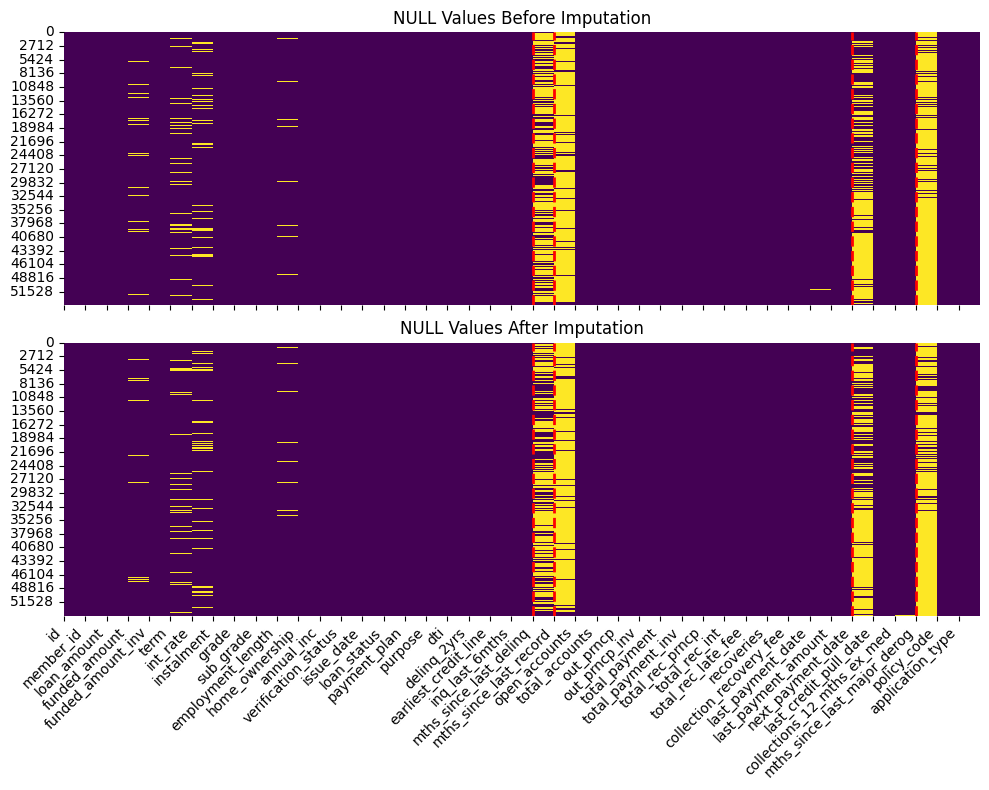

Number of columns before dropping: 43
Number of columns after dropping: 39
DataFrame with columns containing more than 20.0% NULL values dropped
 
The number of null counts per column after columns with more than 20% null values have been removed:
id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_cre

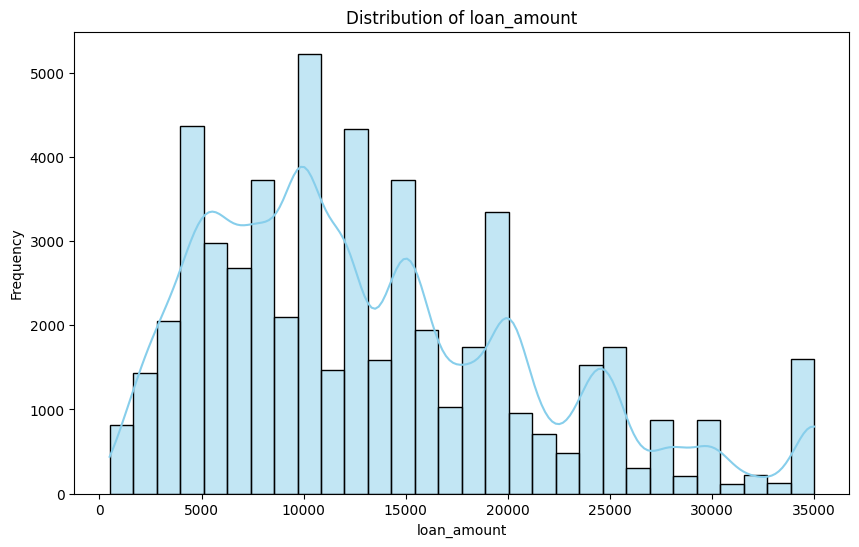

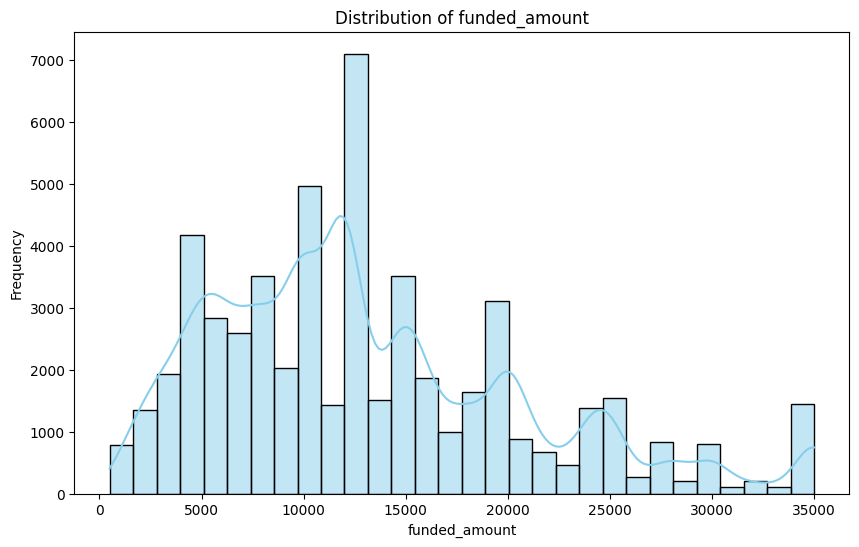

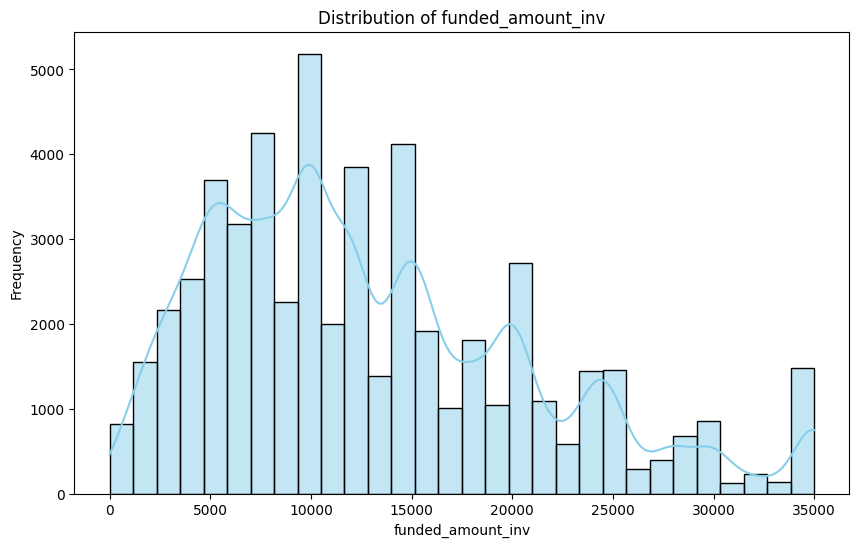

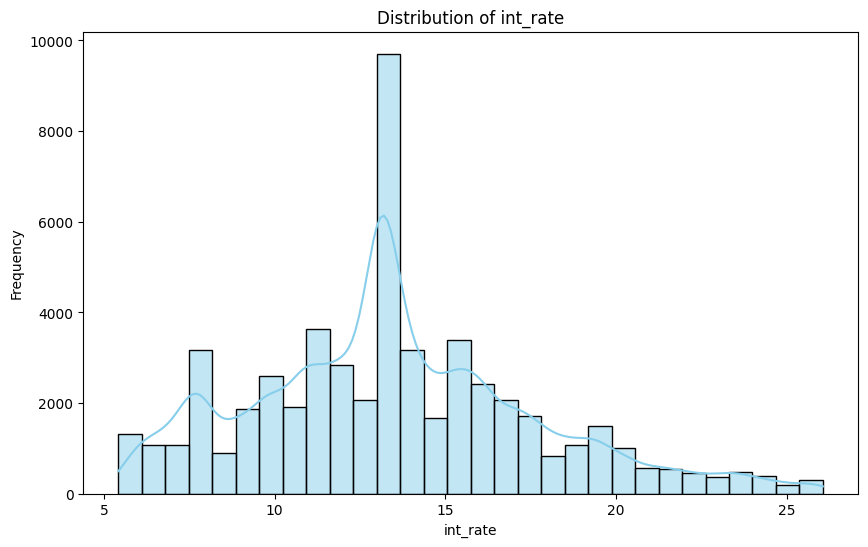

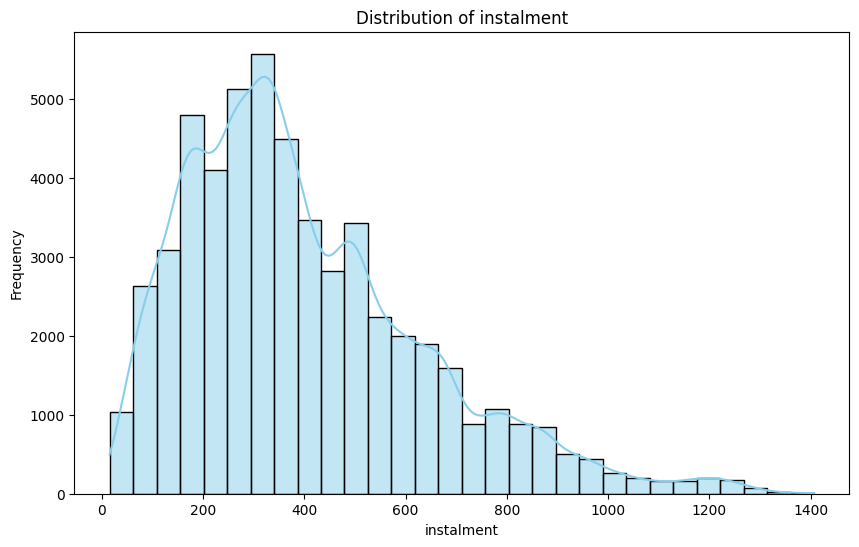

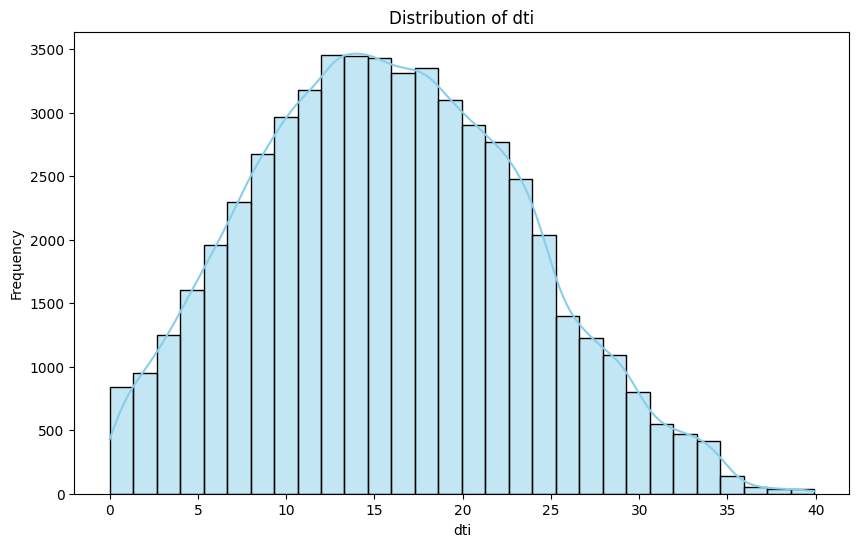

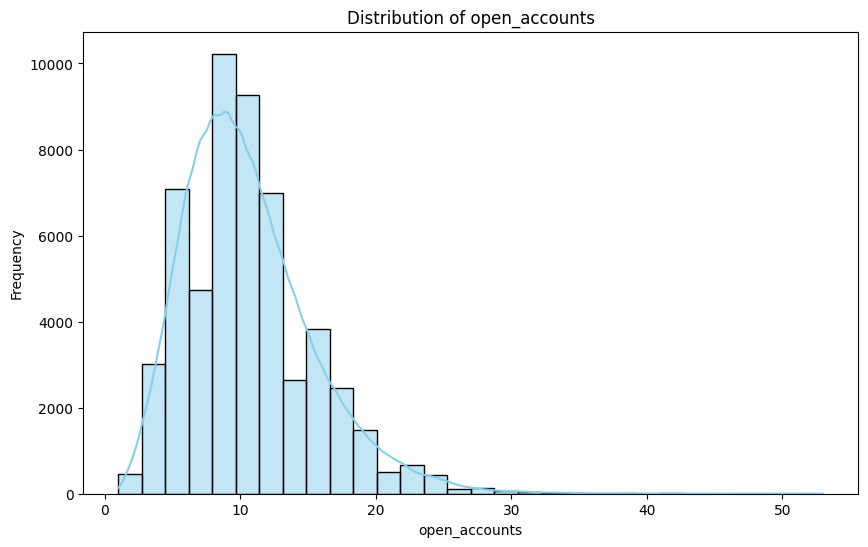

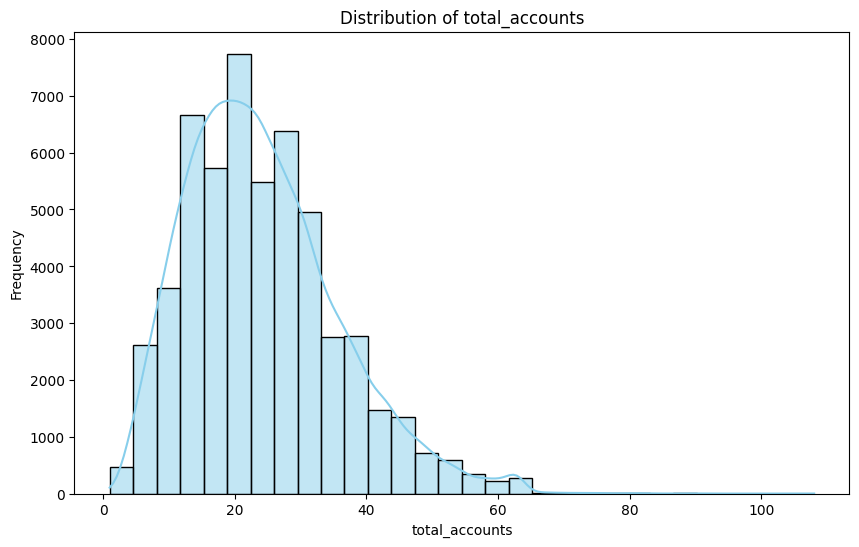

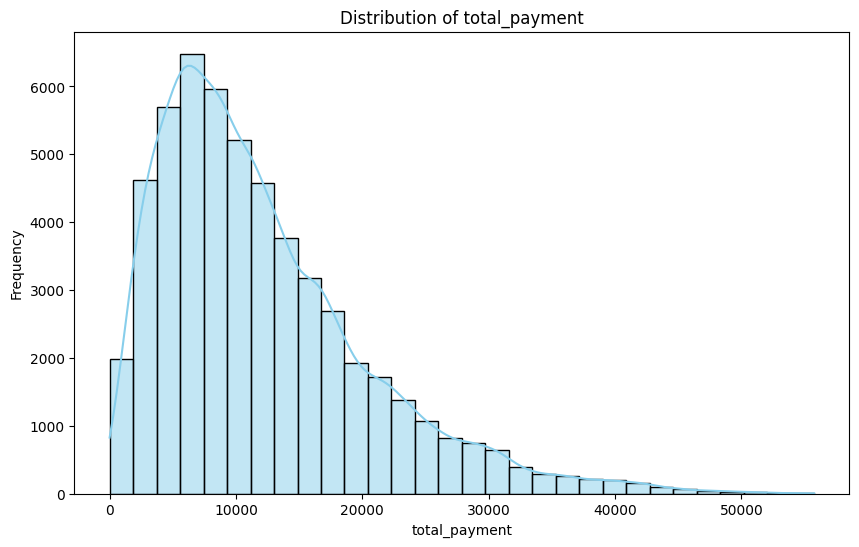

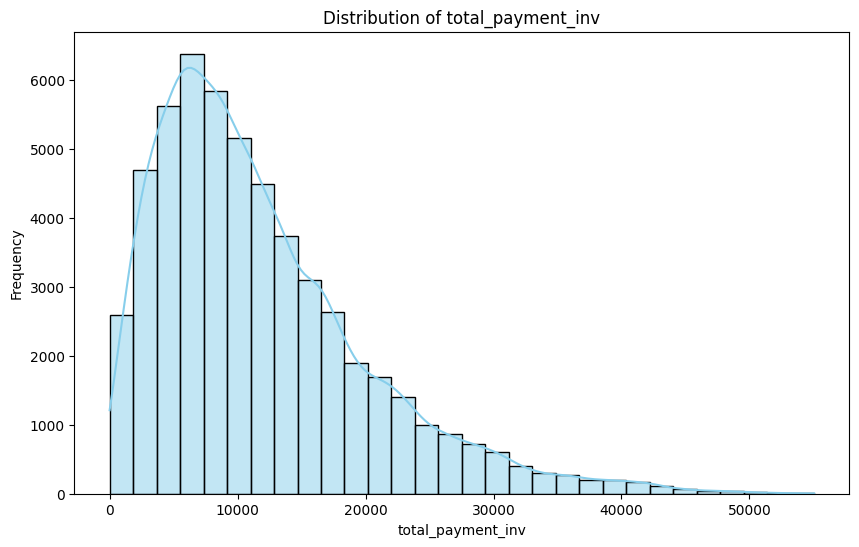

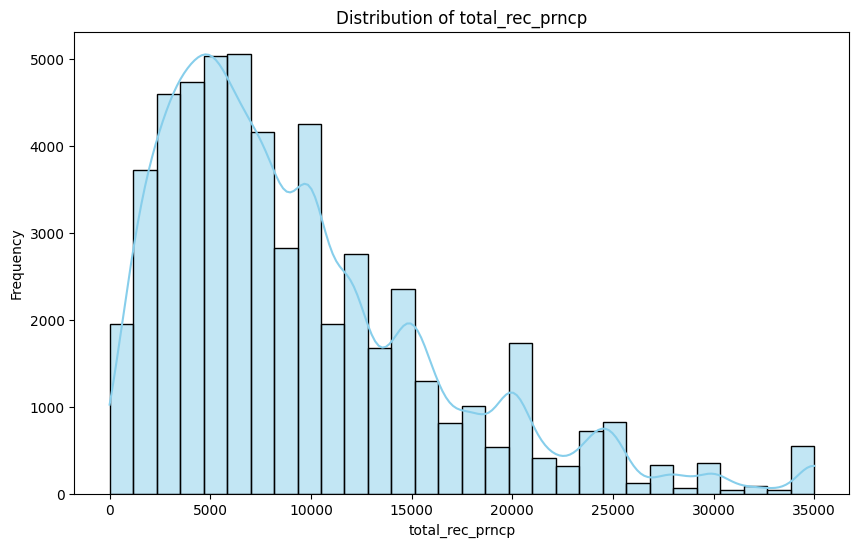

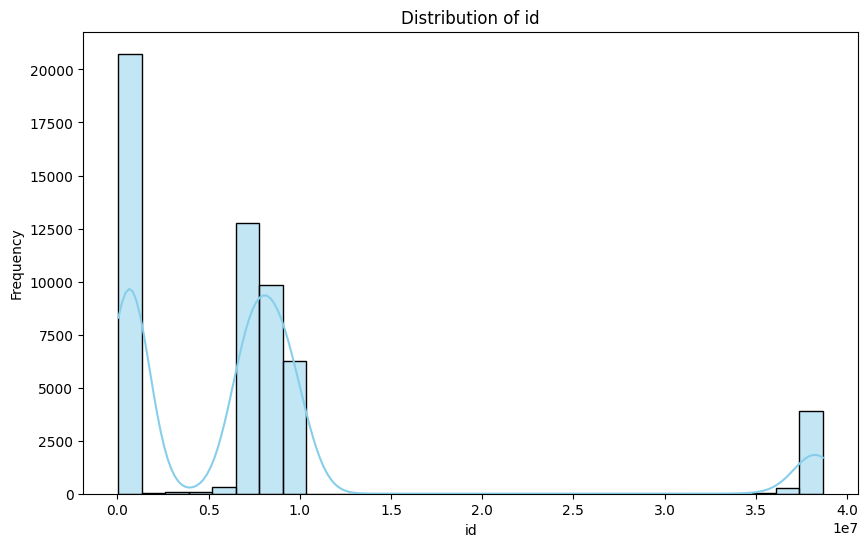

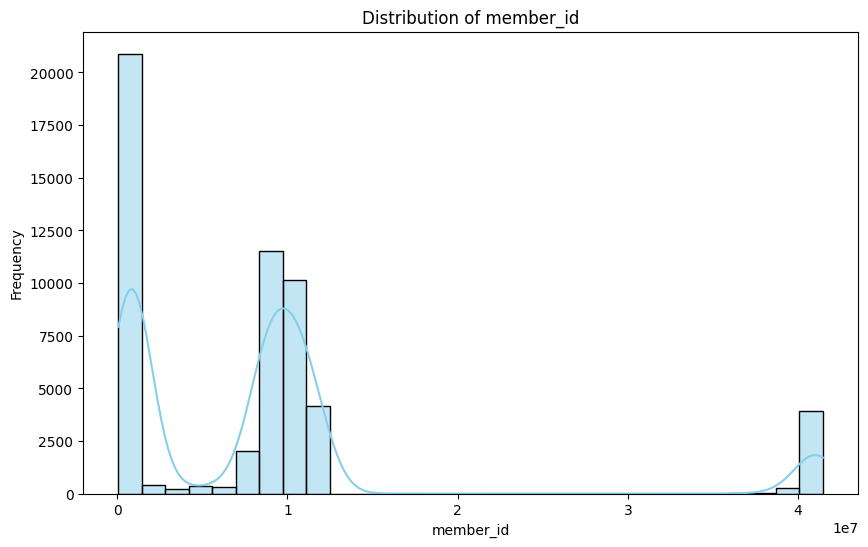

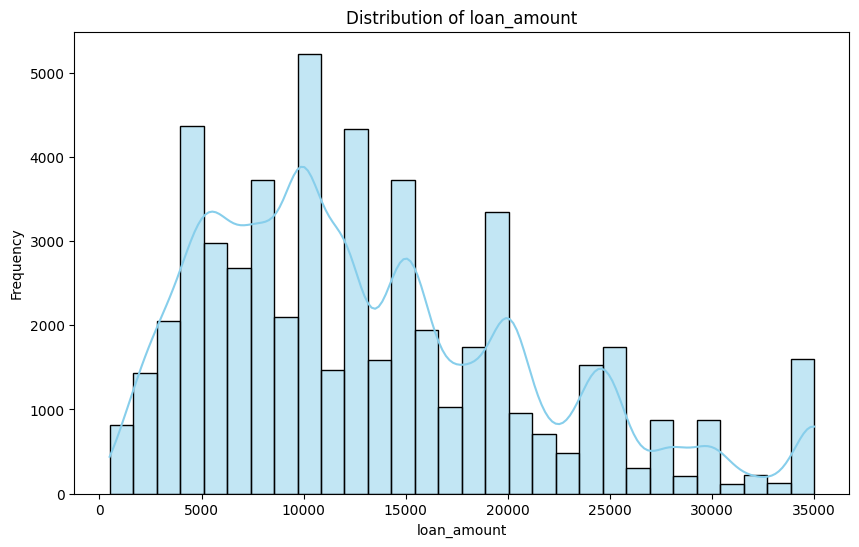

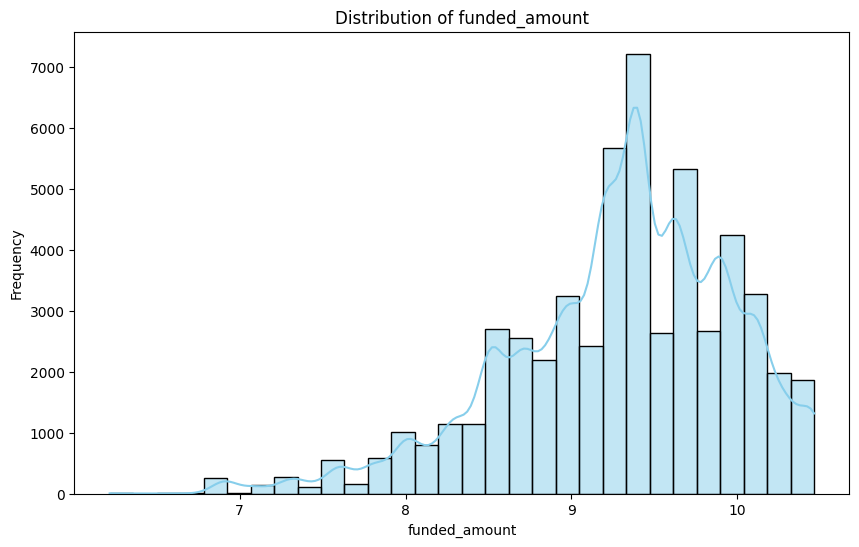

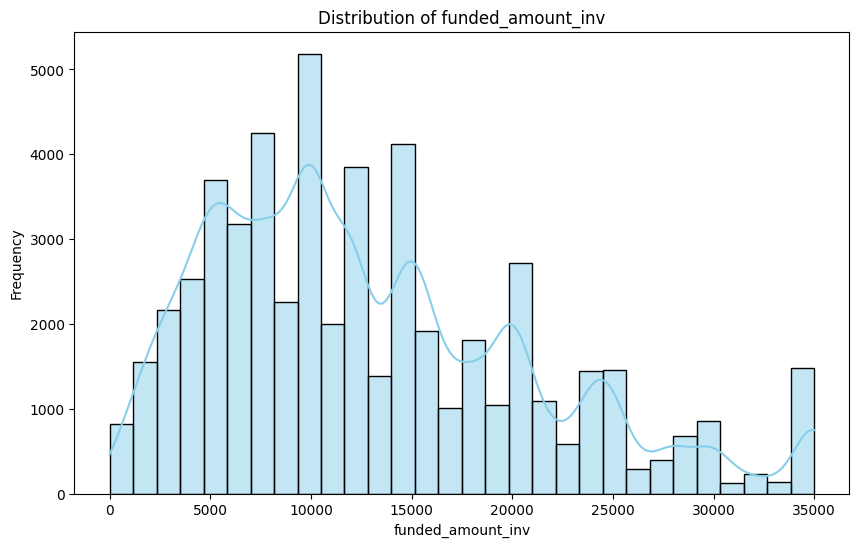

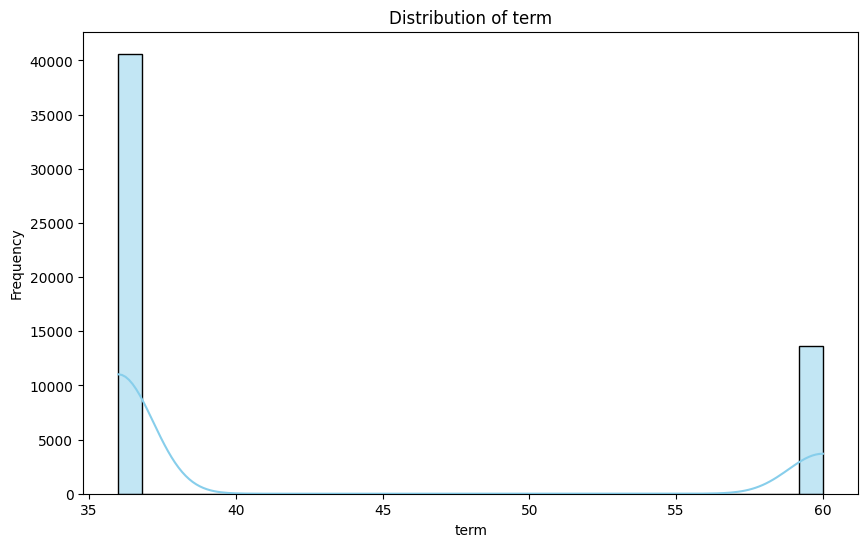

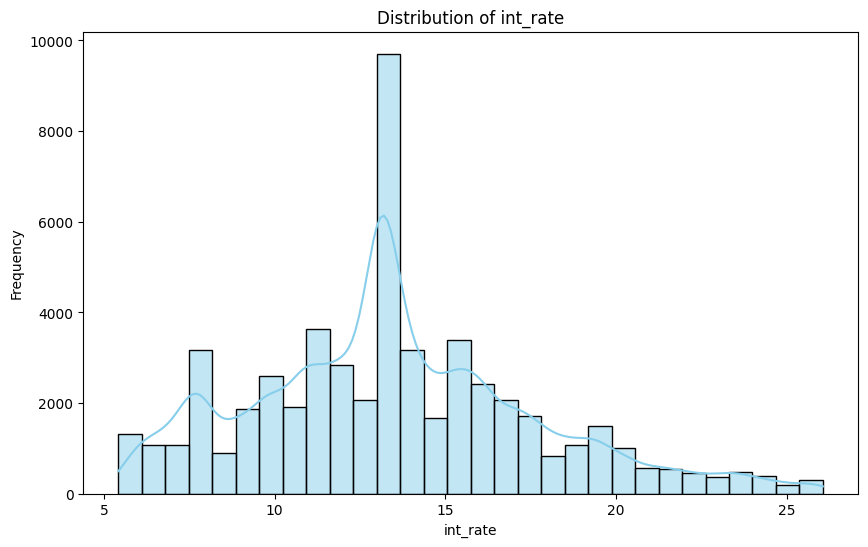

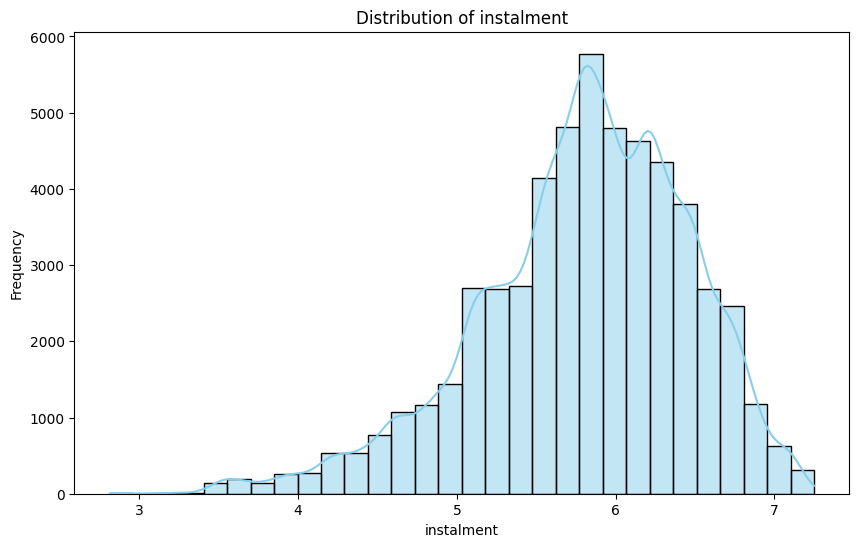

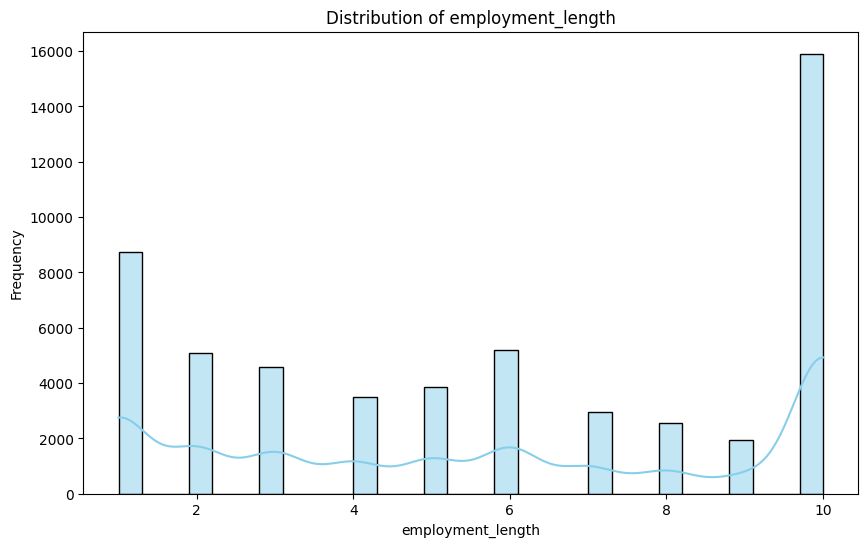

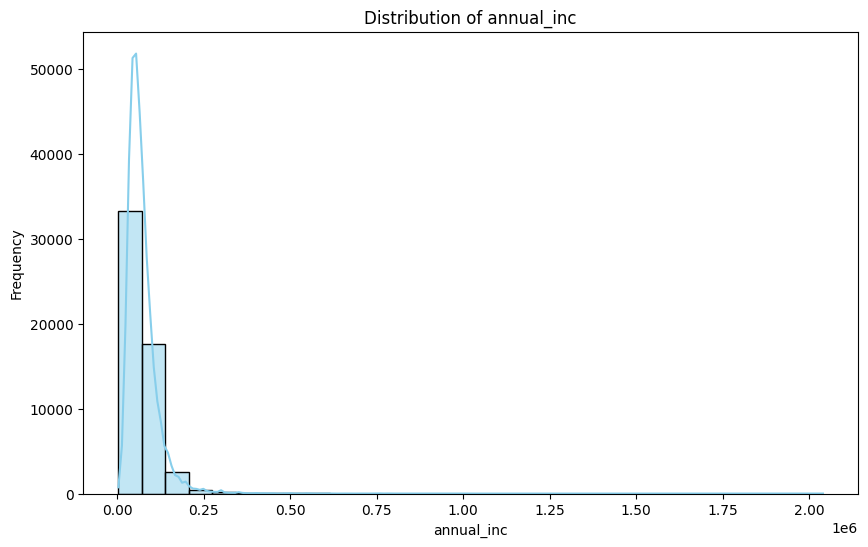

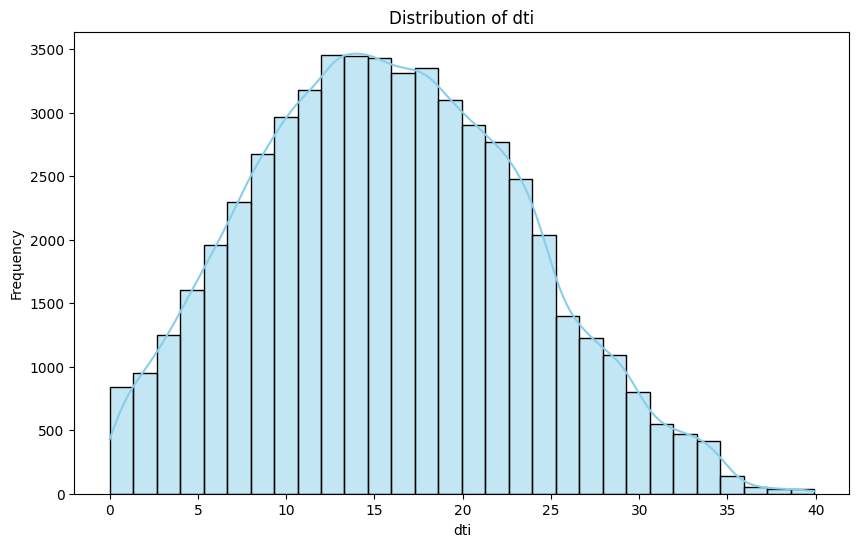

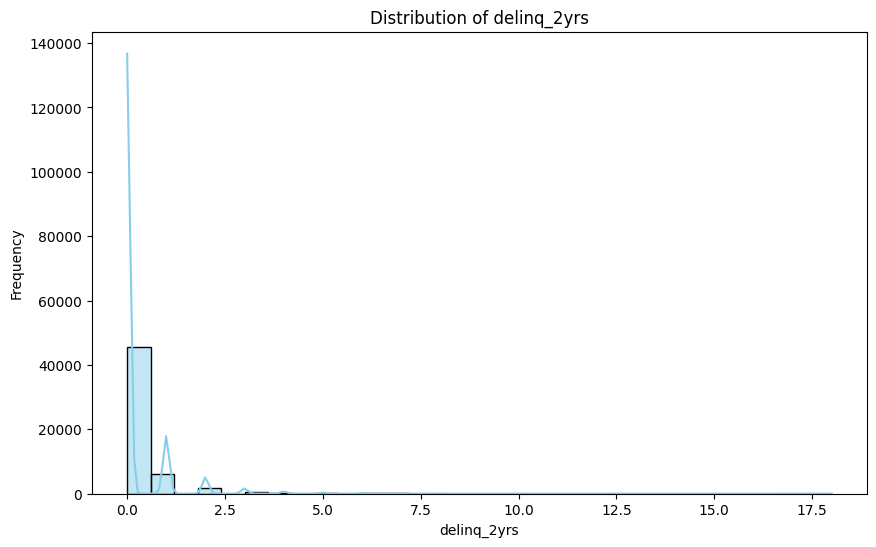

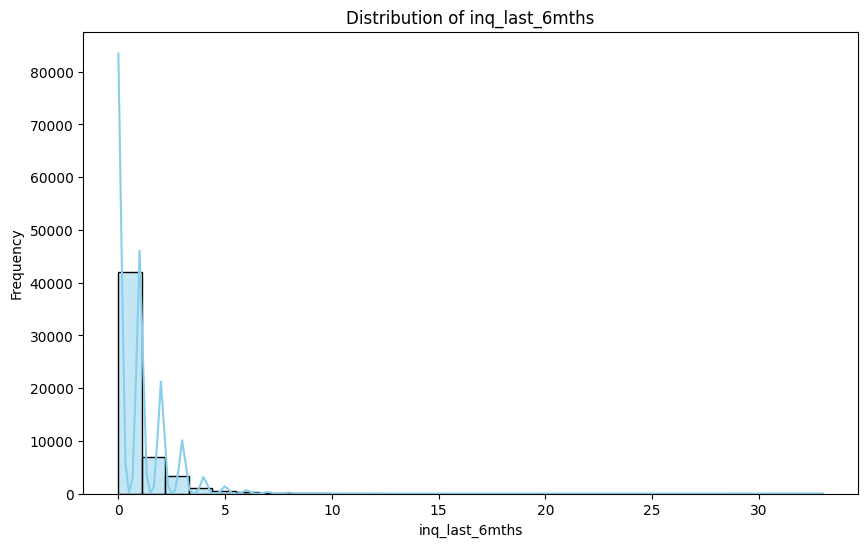

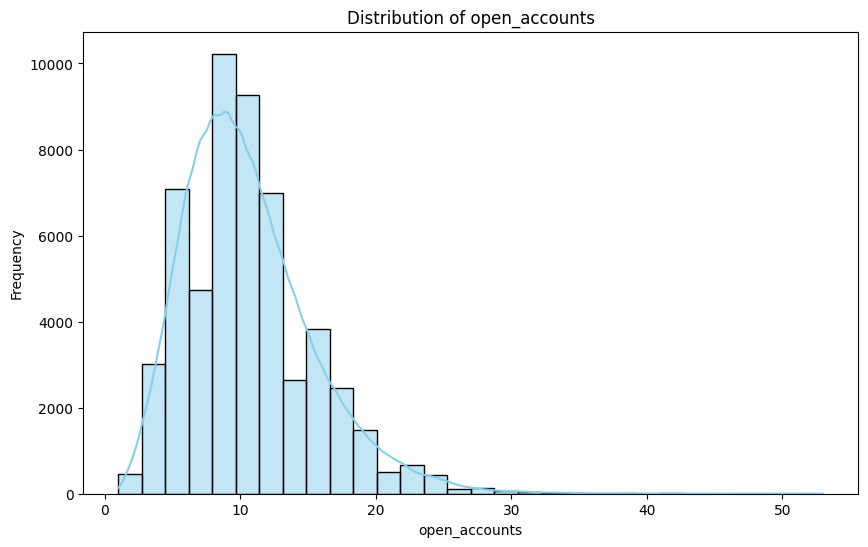

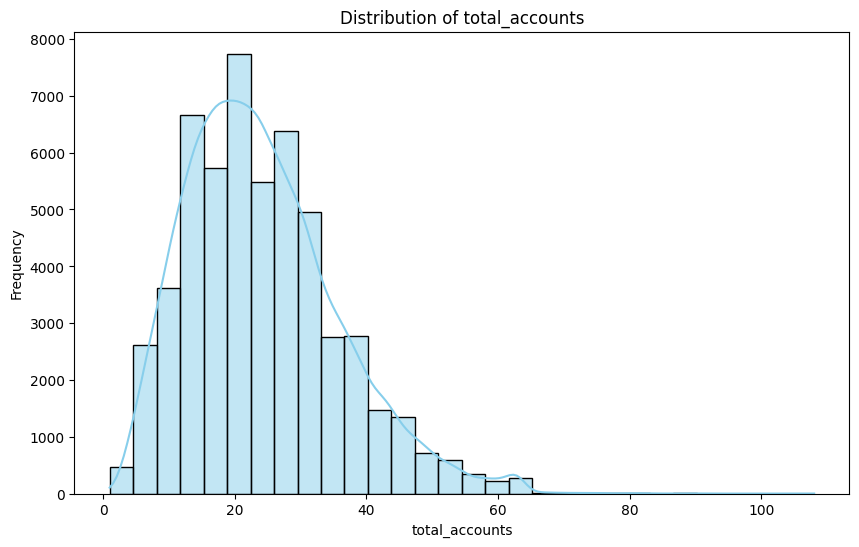

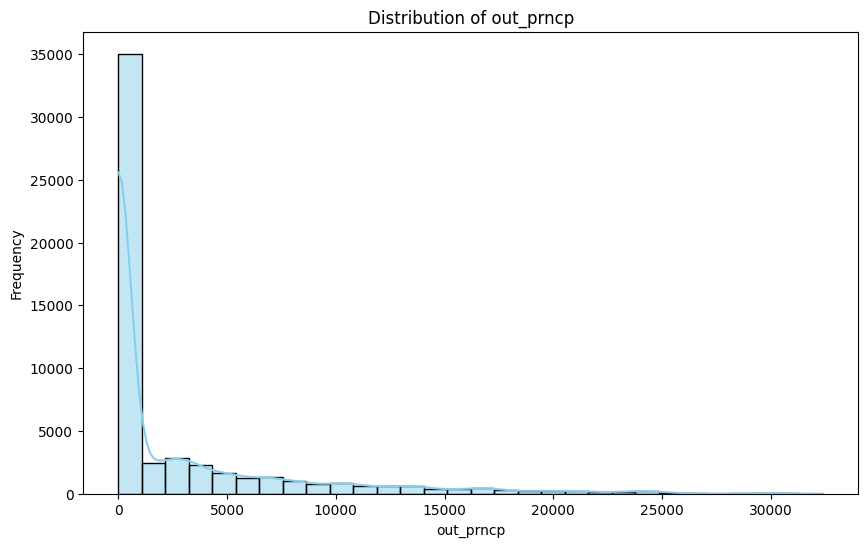

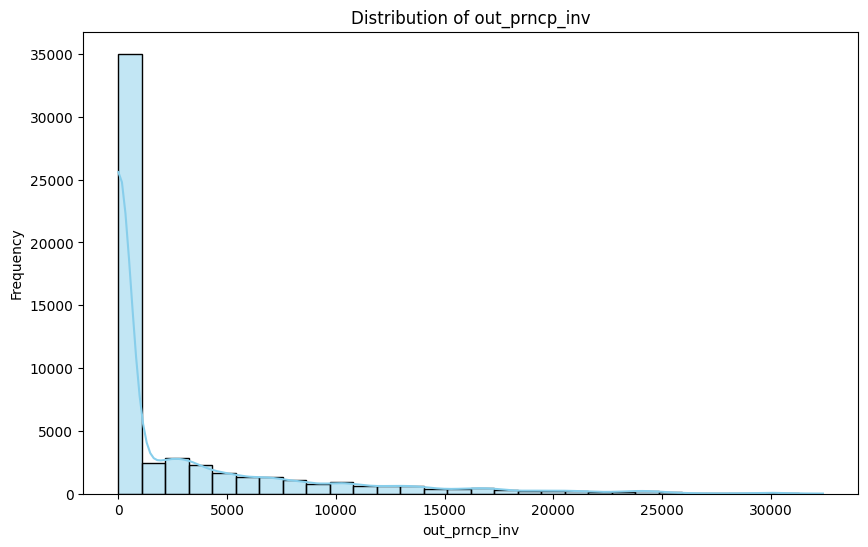

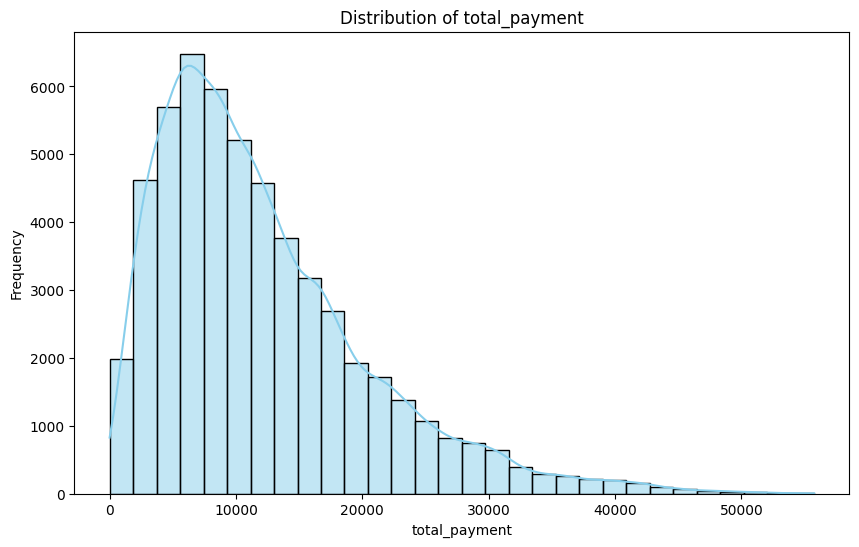

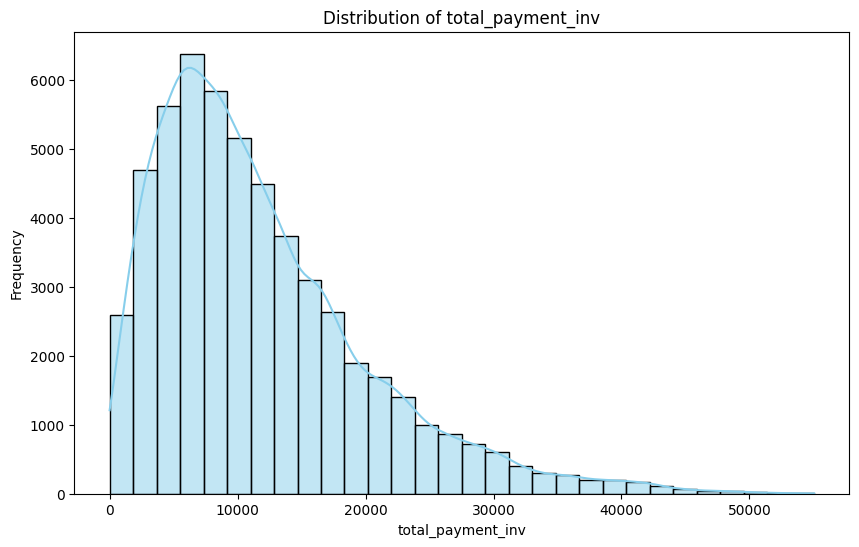

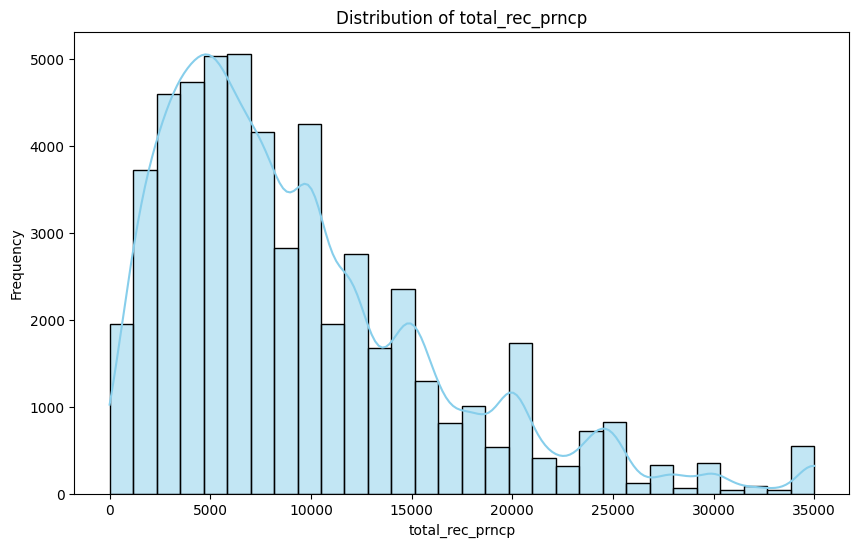

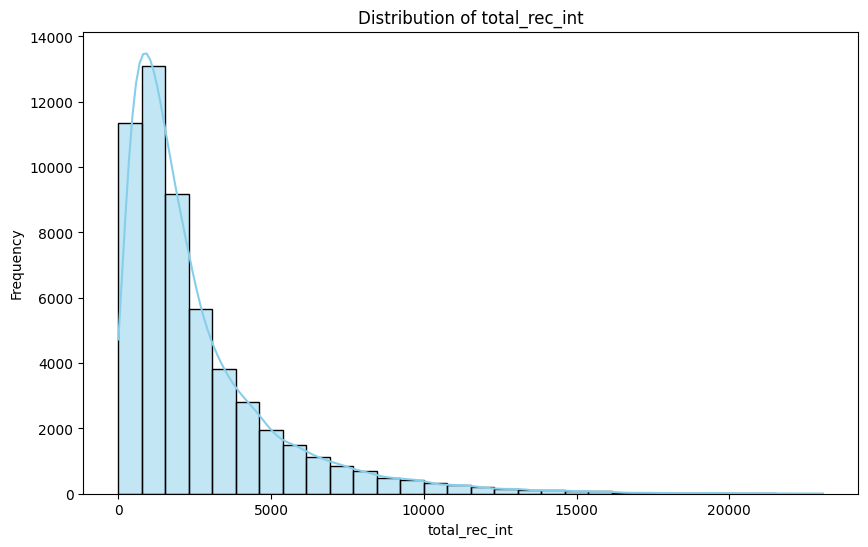

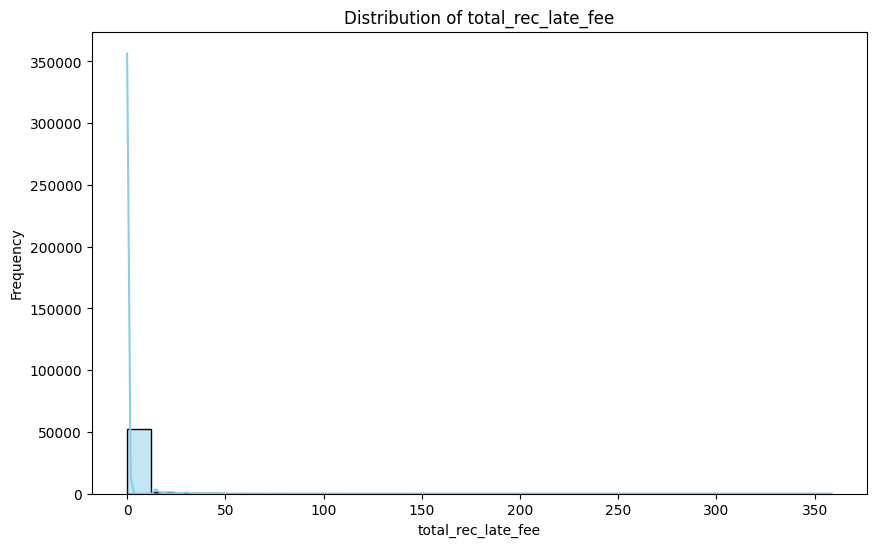

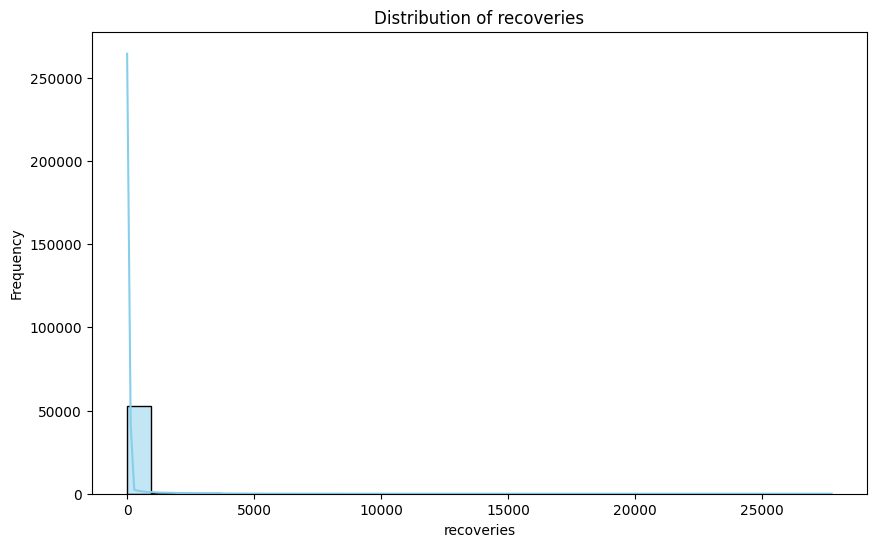

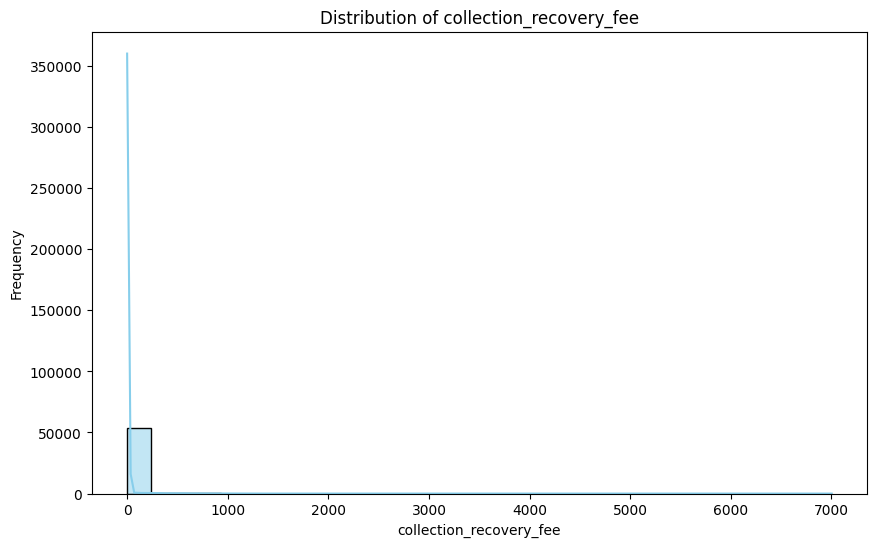

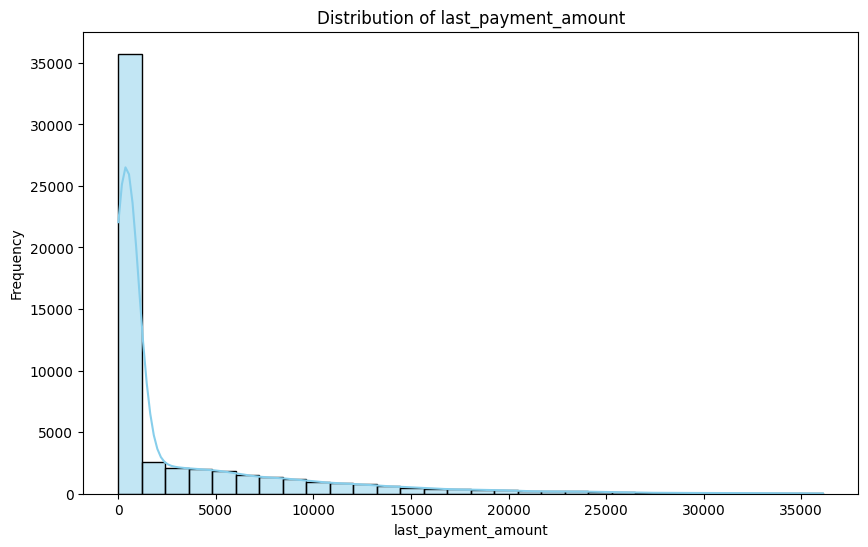

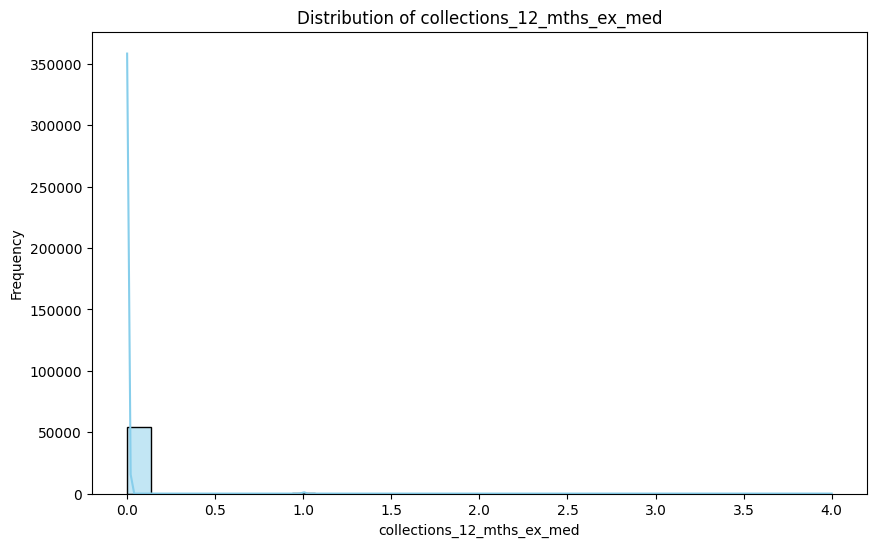

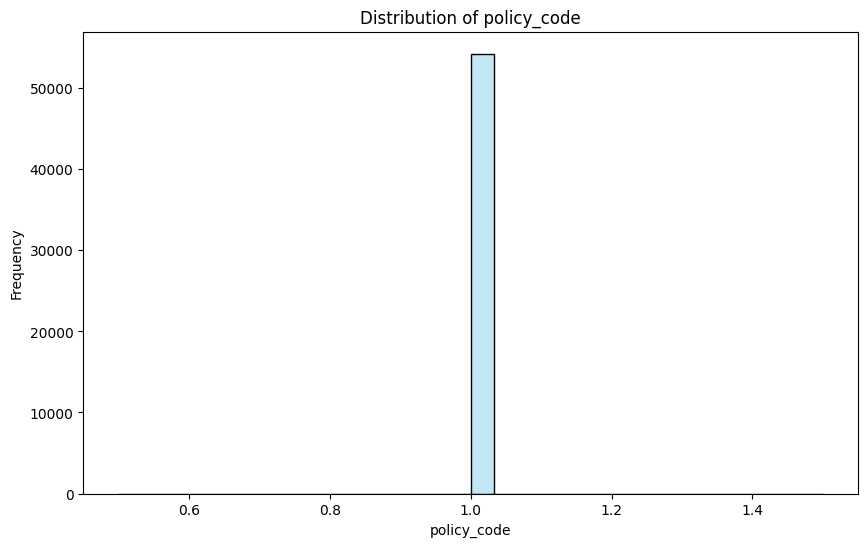

 
REMOVAL OF OUTLIERS:
 
 


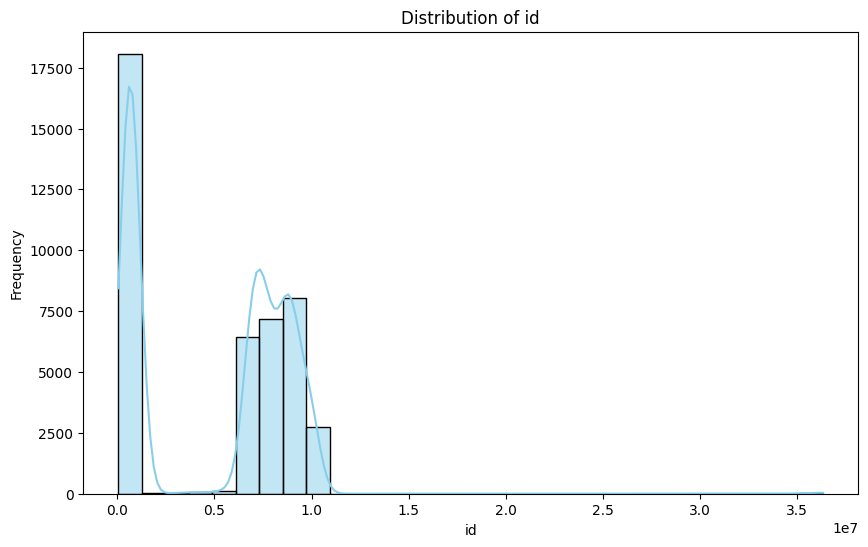

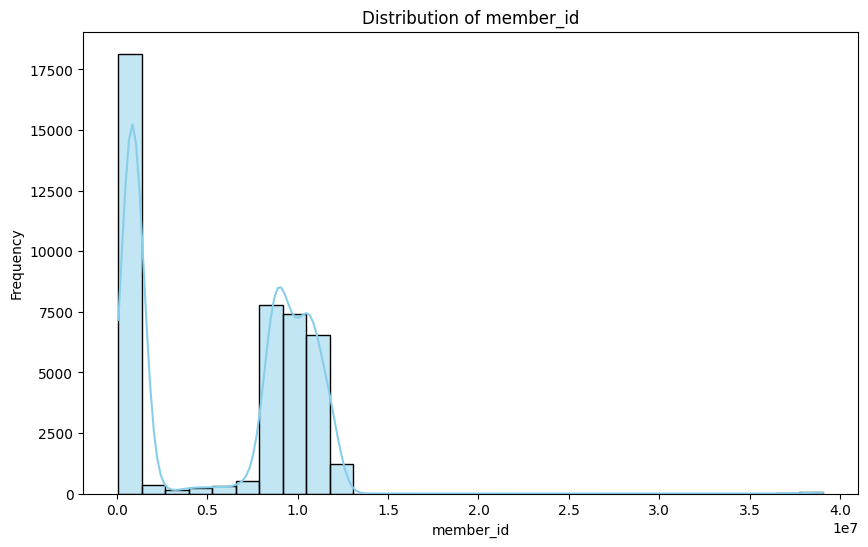

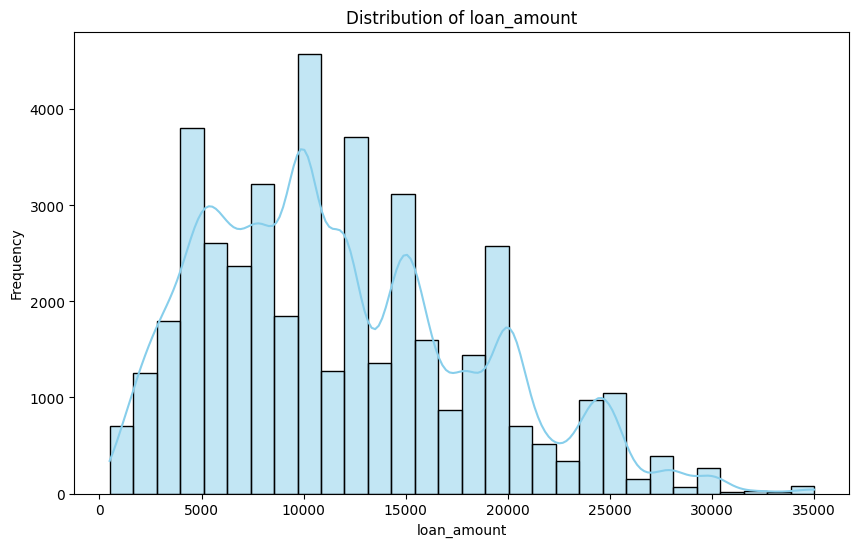

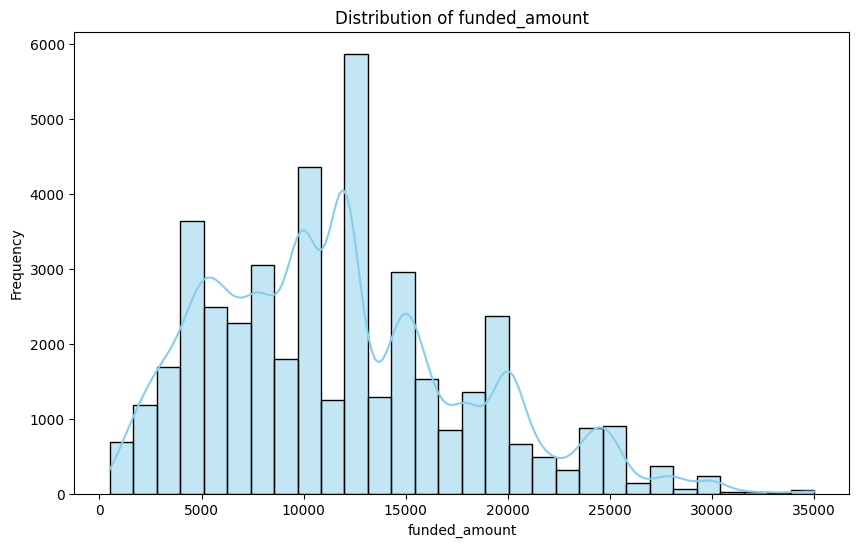

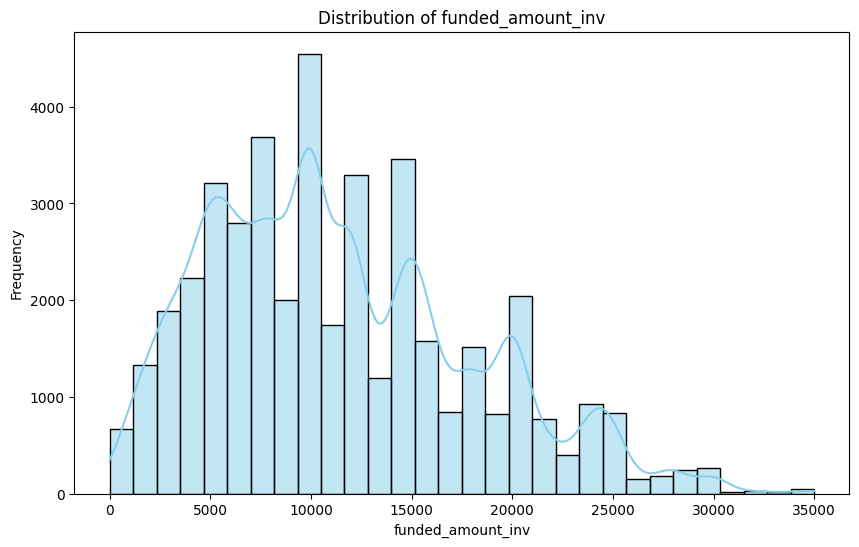

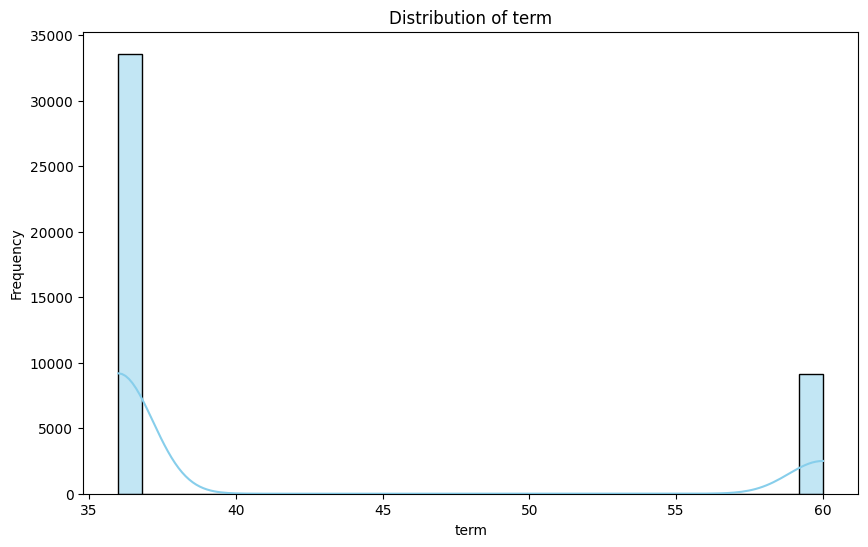

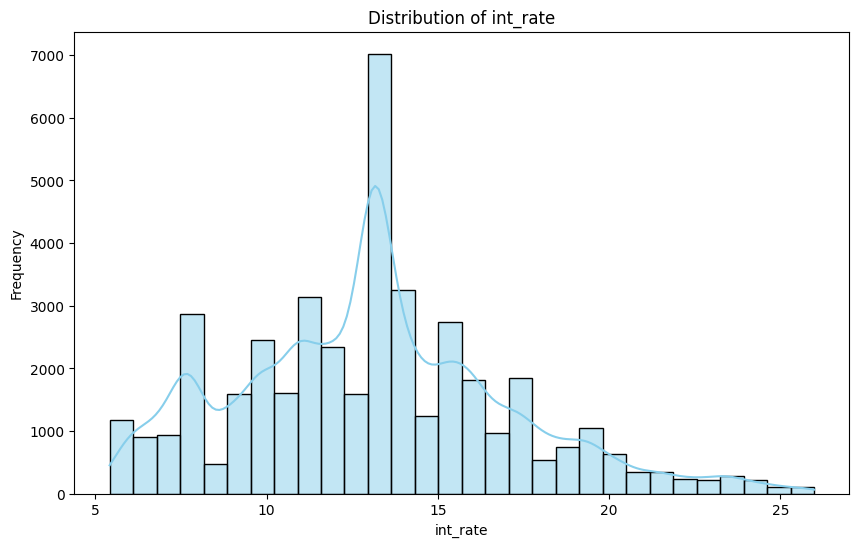

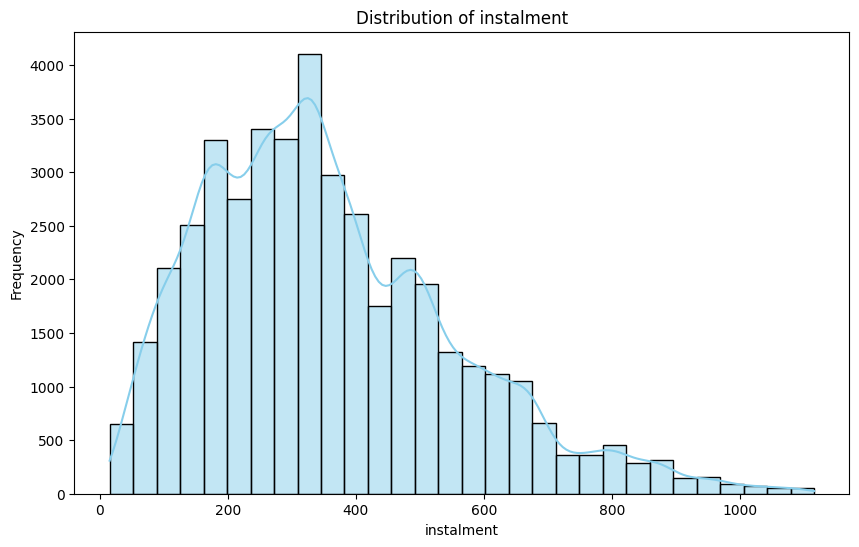

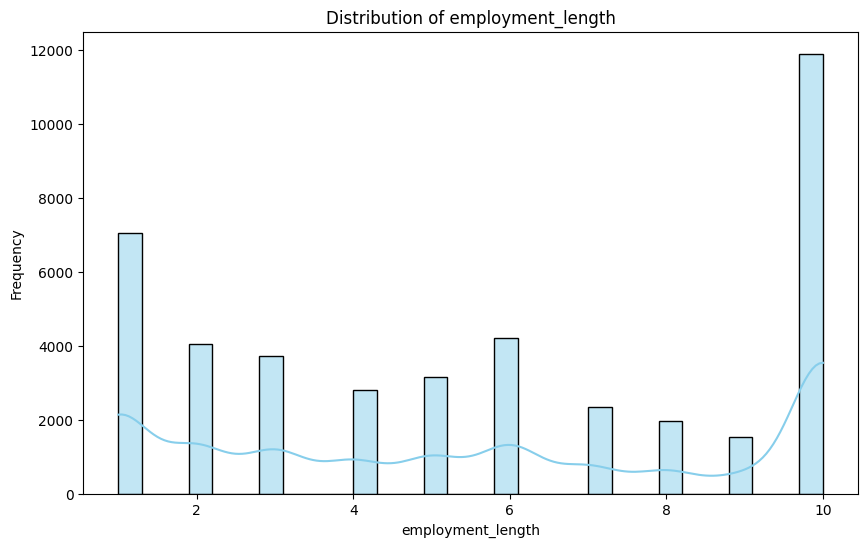

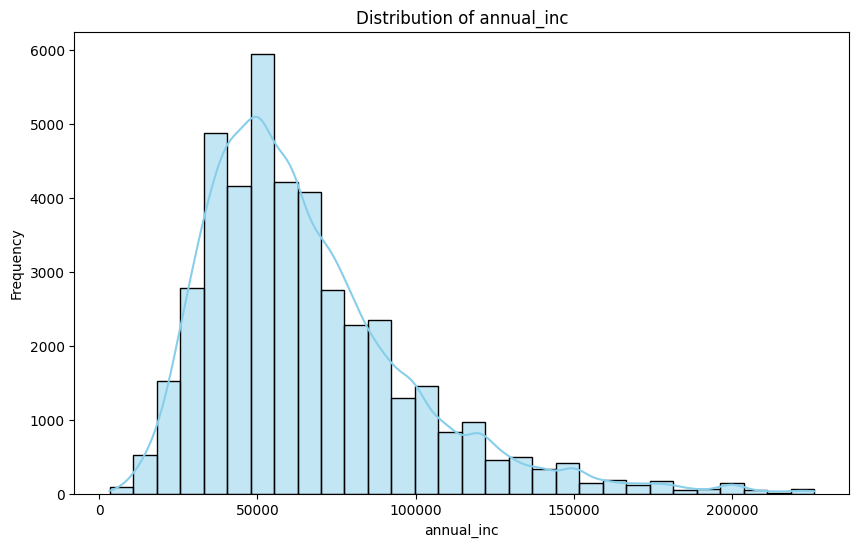

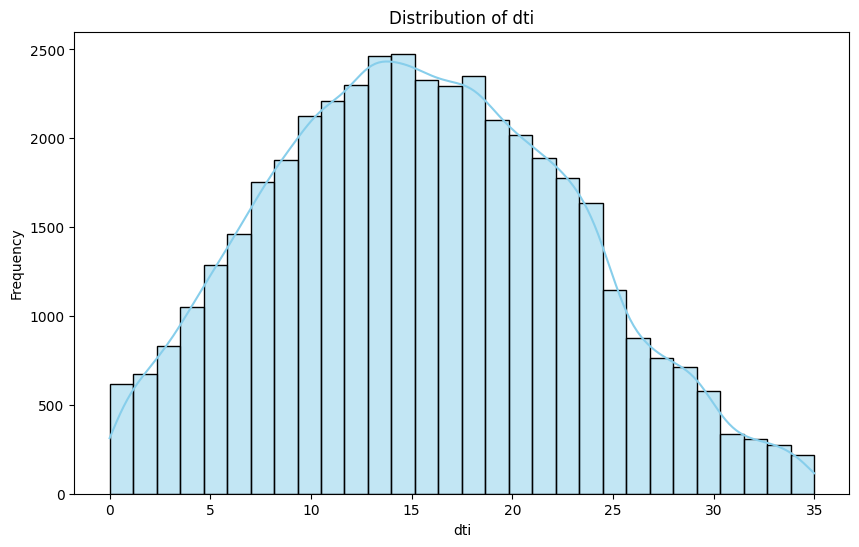

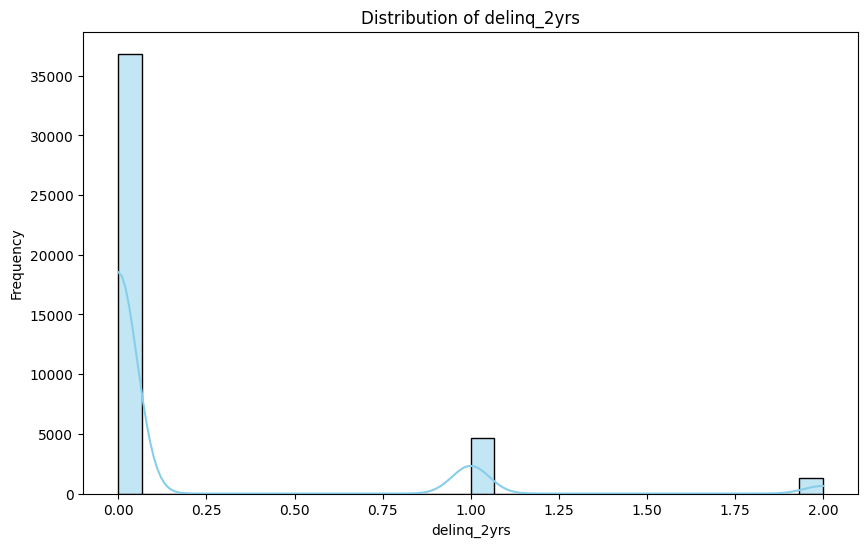

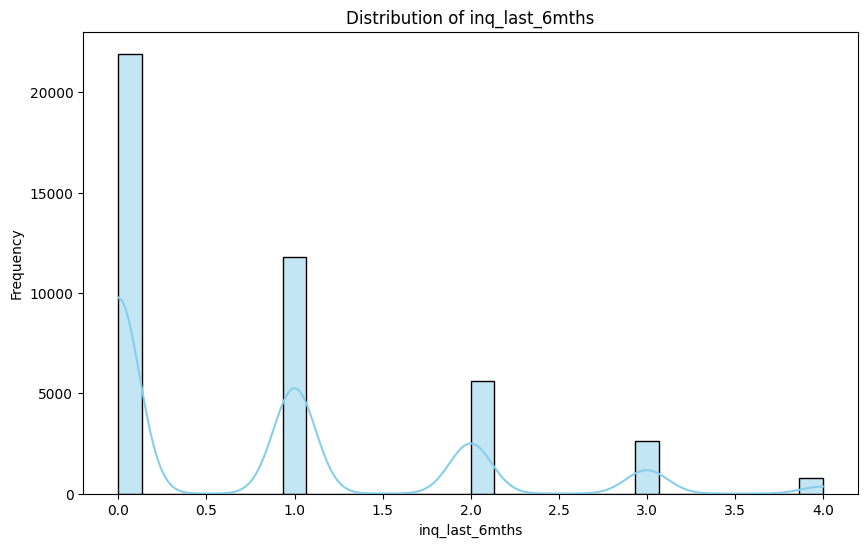

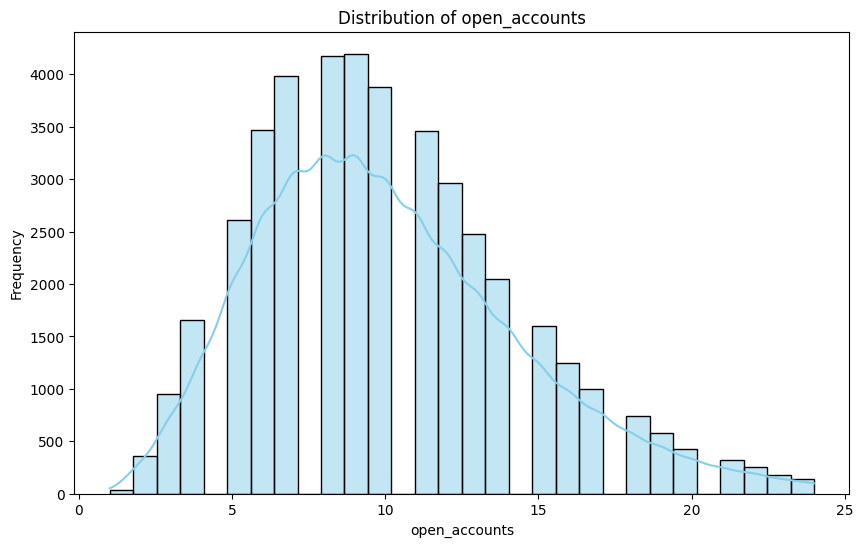

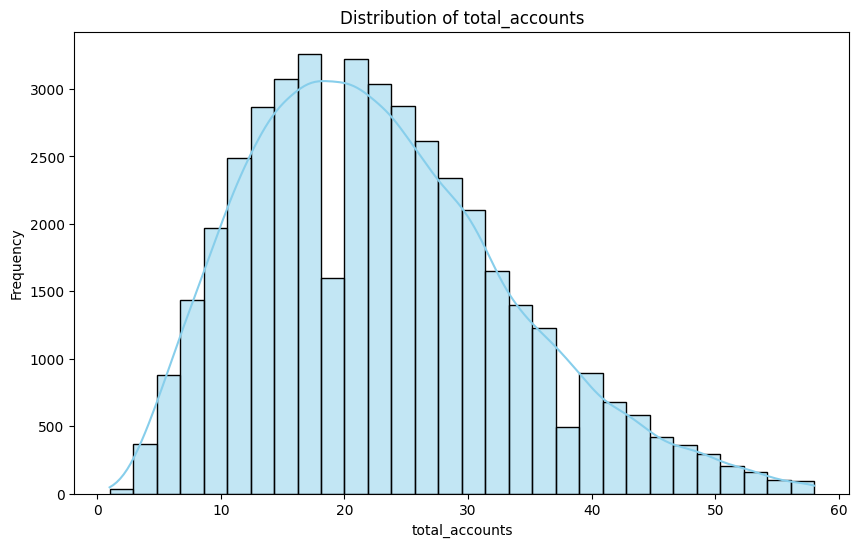

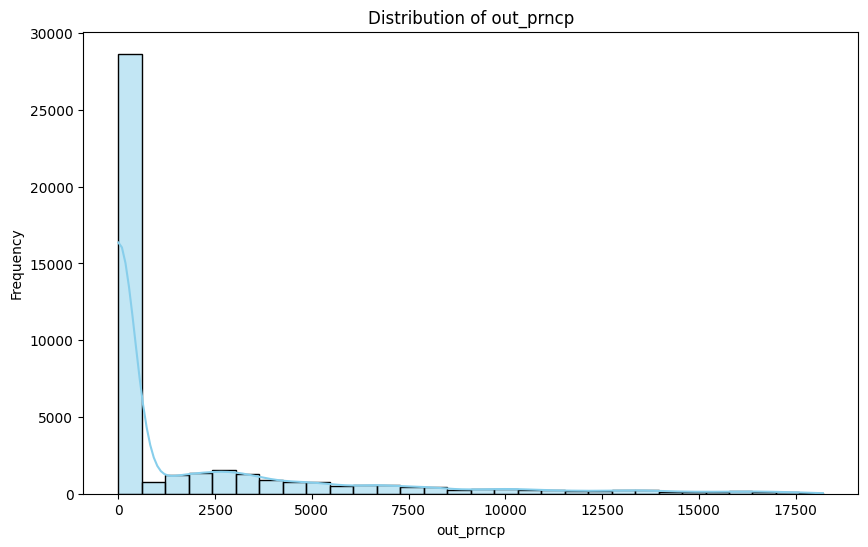

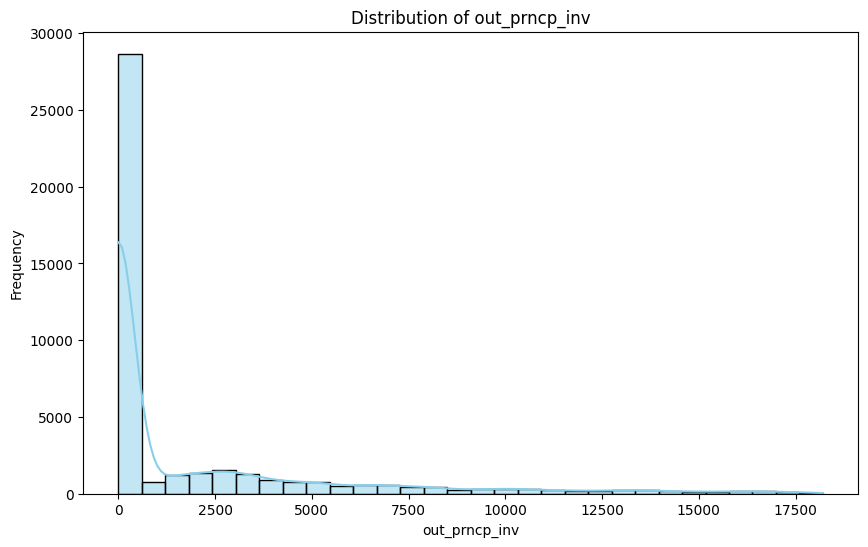

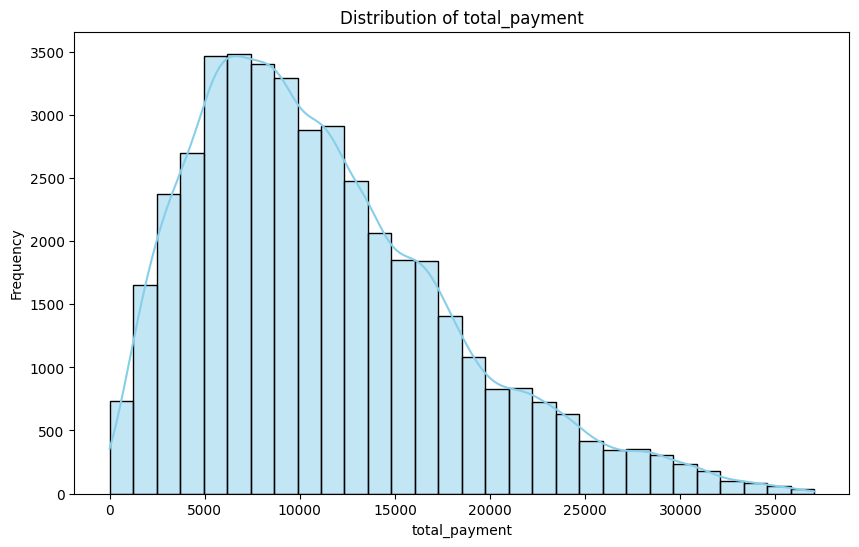

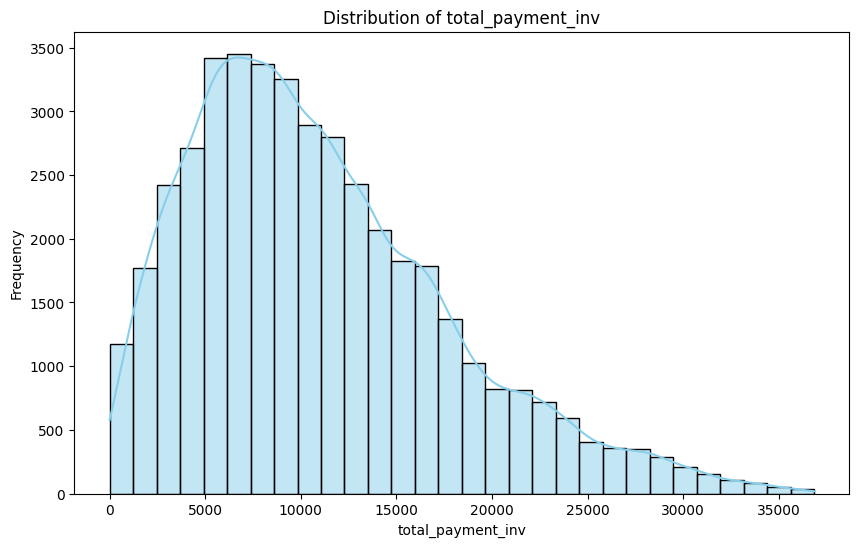

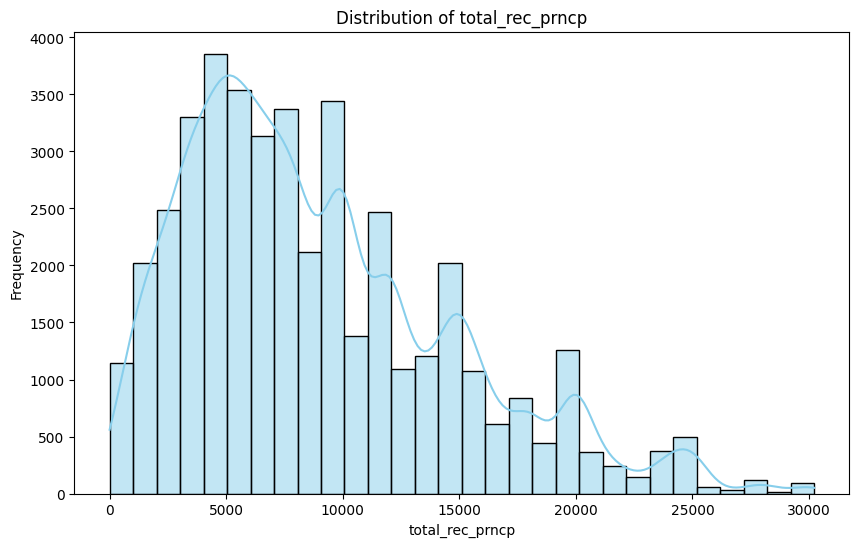

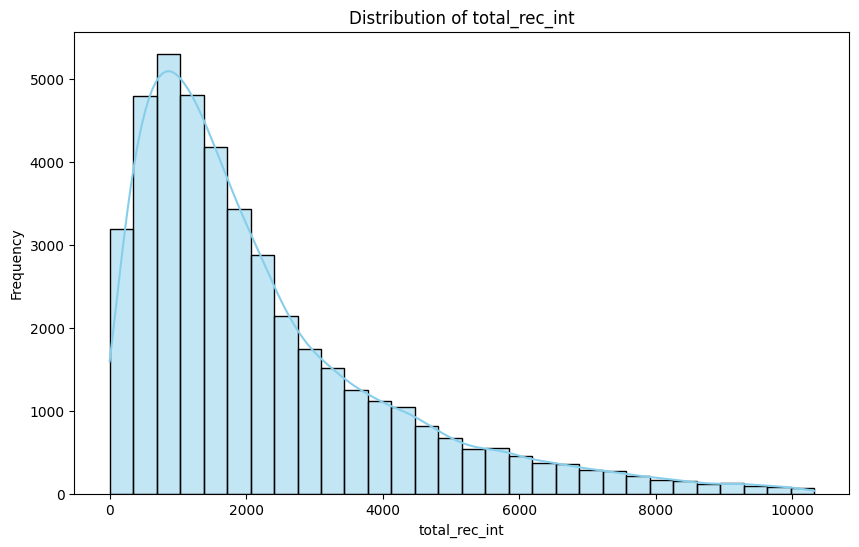

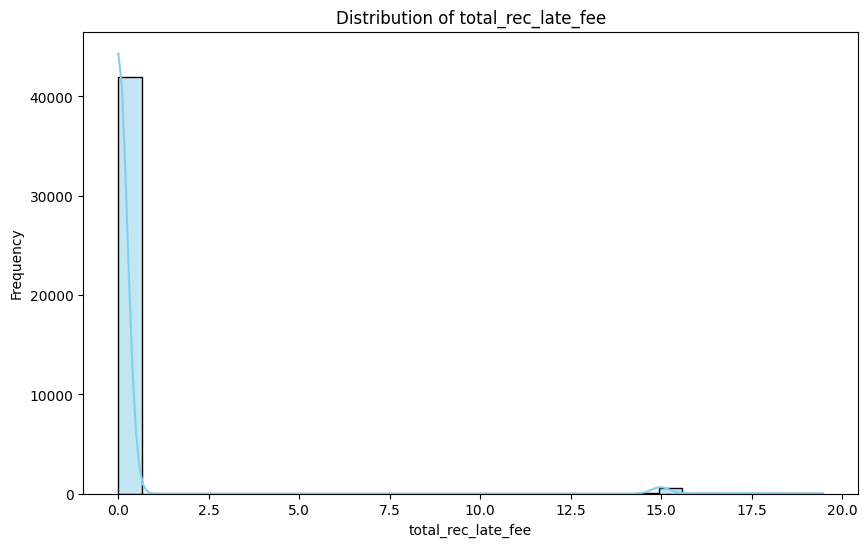

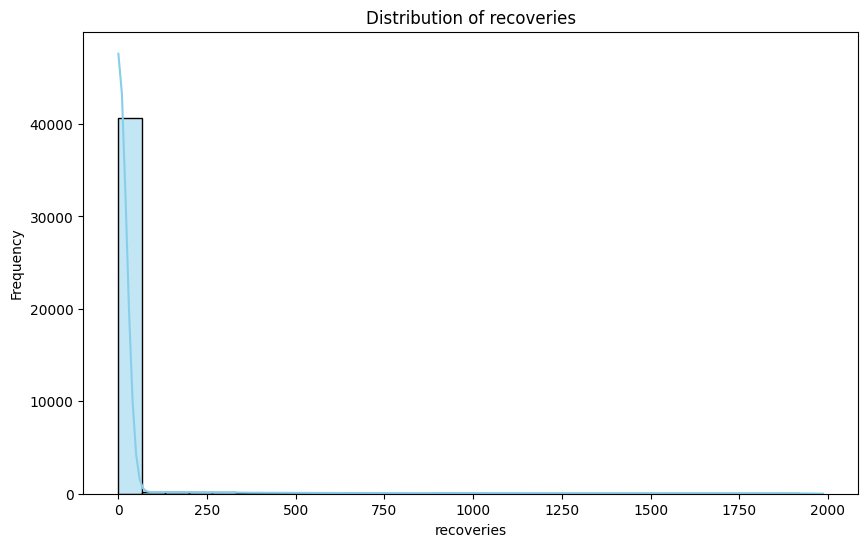

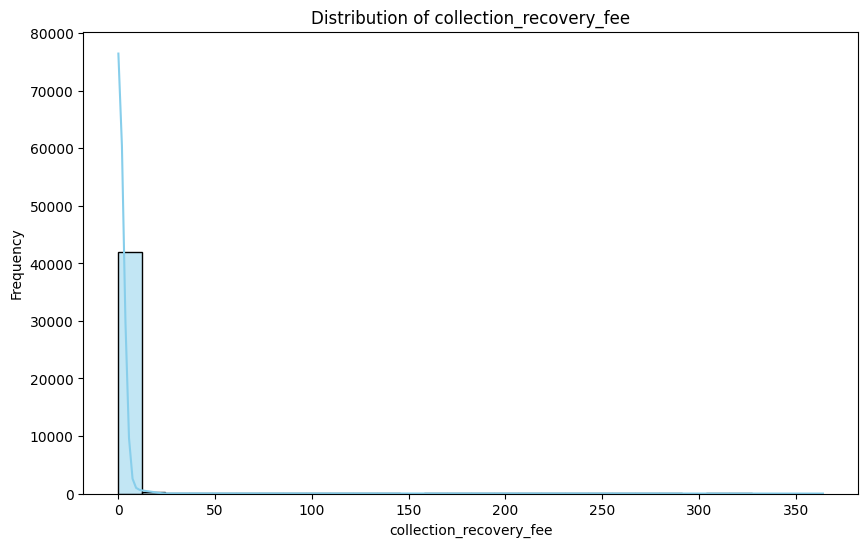

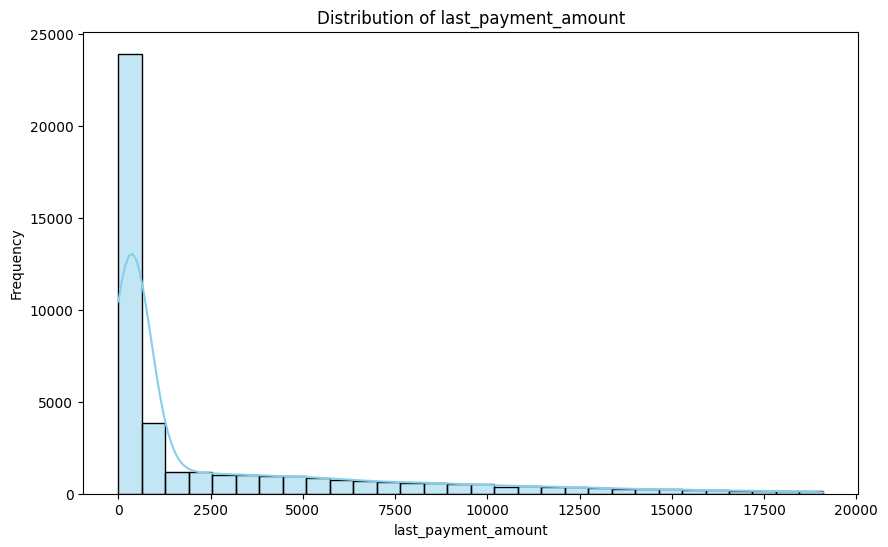

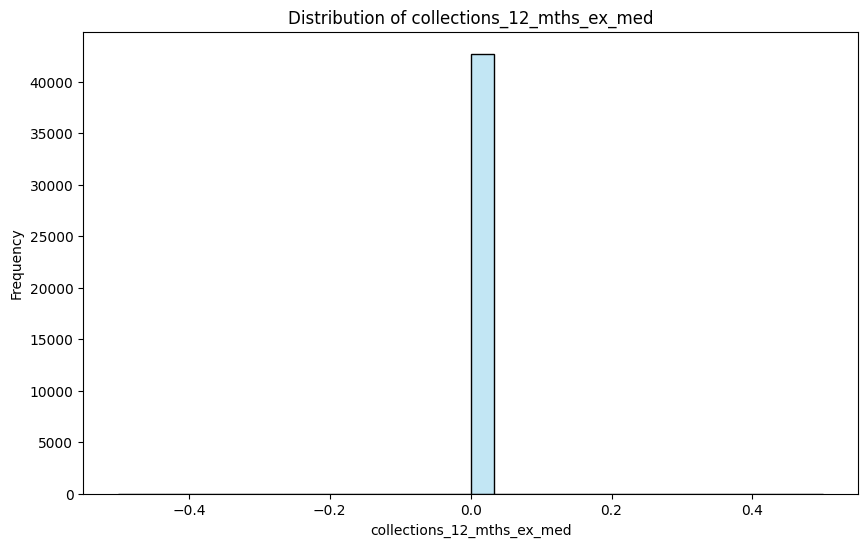

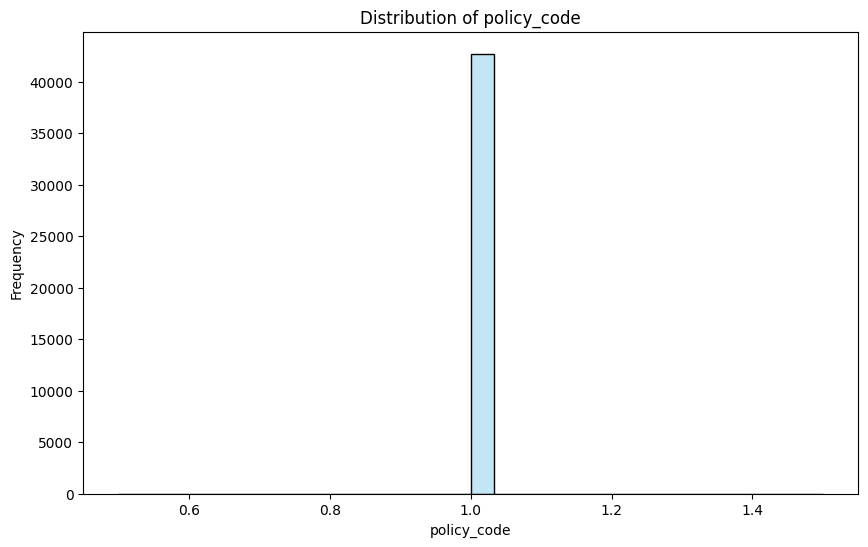

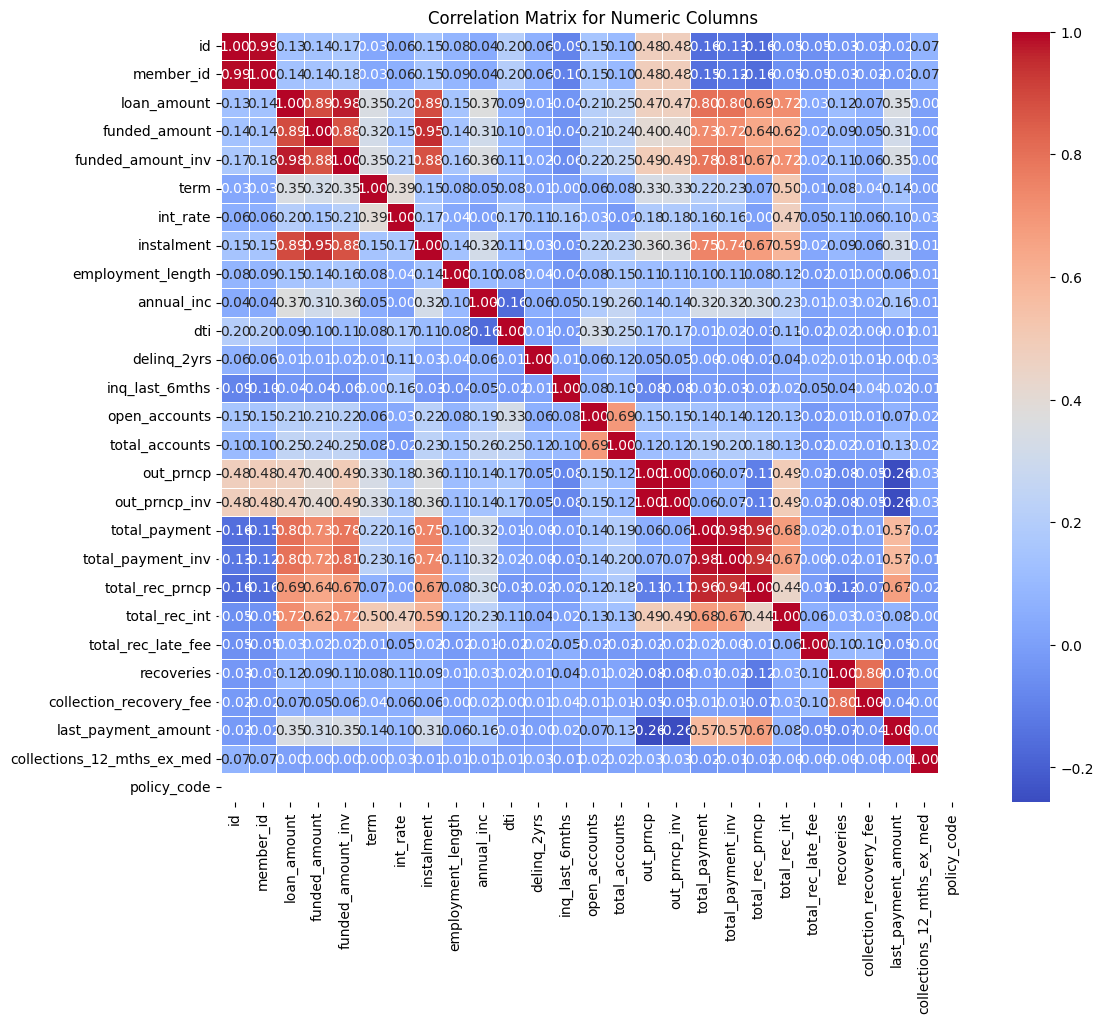

Highly correlated numeric column pairs above threshold (0.8): [('id', 'member_id'), ('member_id', 'id'), ('loan_amount', 'funded_amount'), ('loan_amount', 'funded_amount_inv'), ('loan_amount', 'instalment'), ('loan_amount', 'total_payment'), ('funded_amount', 'loan_amount'), ('funded_amount', 'funded_amount_inv'), ('funded_amount', 'instalment'), ('funded_amount_inv', 'loan_amount'), ('funded_amount_inv', 'funded_amount'), ('funded_amount_inv', 'instalment'), ('funded_amount_inv', 'total_payment_inv'), ('instalment', 'loan_amount'), ('instalment', 'funded_amount'), ('instalment', 'funded_amount_inv'), ('out_prncp', 'out_prncp_inv'), ('out_prncp_inv', 'out_prncp'), ('total_payment', 'loan_amount'), ('total_payment', 'total_payment_inv'), ('total_payment', 'total_rec_prncp'), ('total_payment_inv', 'funded_amount_inv'), ('total_payment_inv', 'total_payment'), ('total_payment_inv', 'total_rec_prncp'), ('total_rec_prncp', 'total_payment'), ('total_rec_prncp', 'total_payment_inv'), ('recover

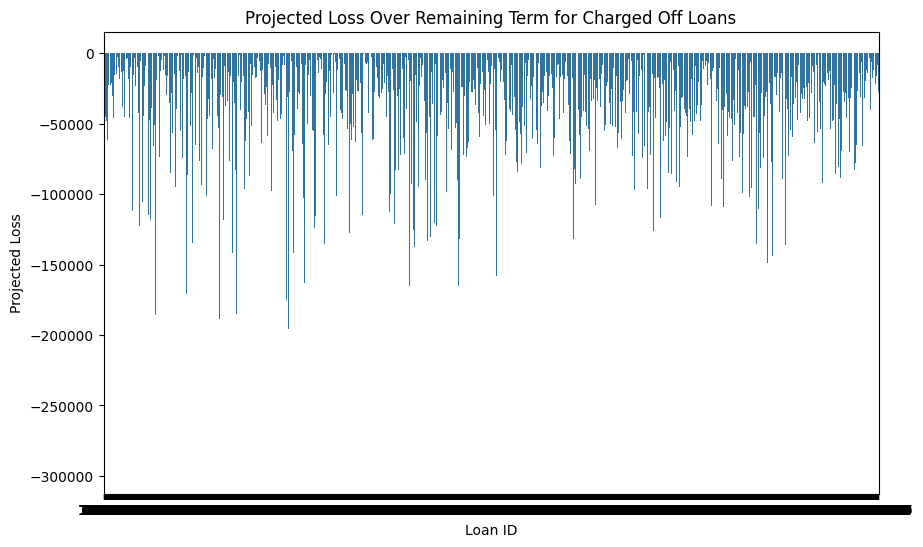

Total Projected Loss for Charged Off Loans: £-228958911.16
The percentage of customers currently behind on loan payments in relation to total customers: 1.26%
The number of customers behind on loan payments: 686
The loss the company would face if the status of the individuals behind on payments were changed to Charged Off: £6894024.95
The projected loss the company would face if these customers were to finish their full loan term: £-42838164.04
The percentage of total expected revenue represented by customers who have late payments and defaulted loans: -33.90%


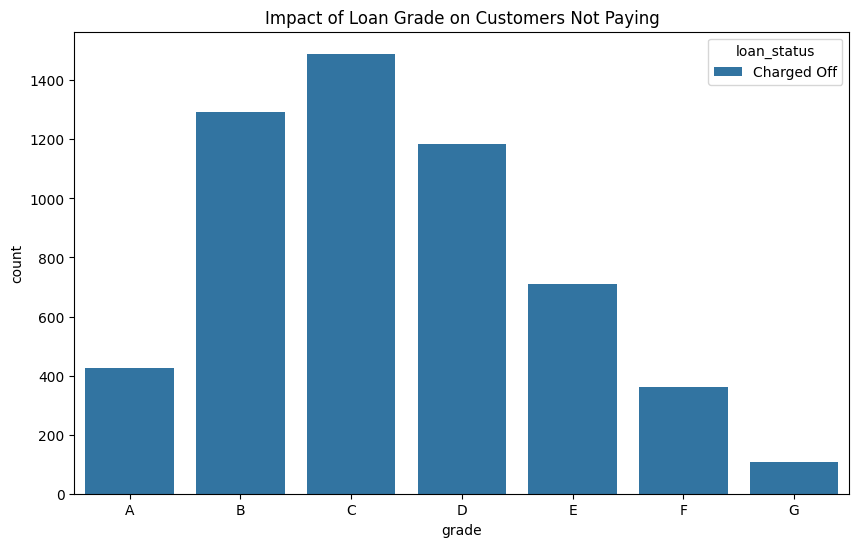

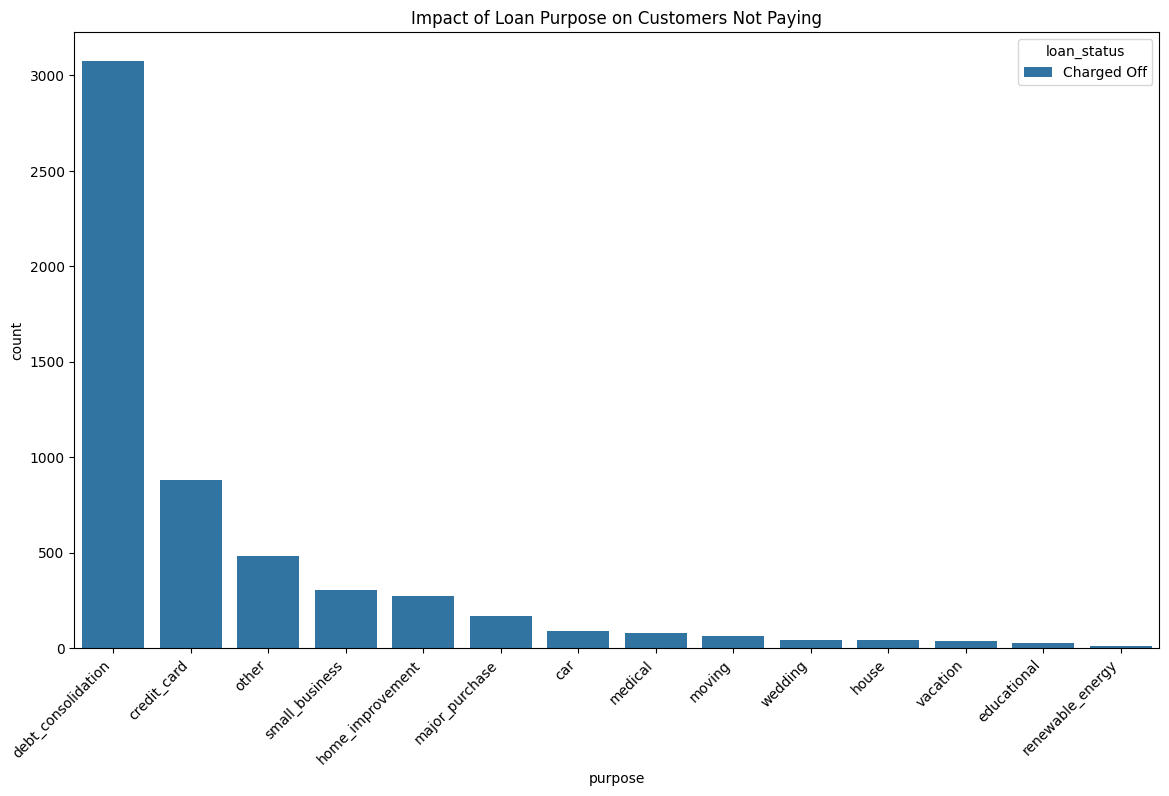

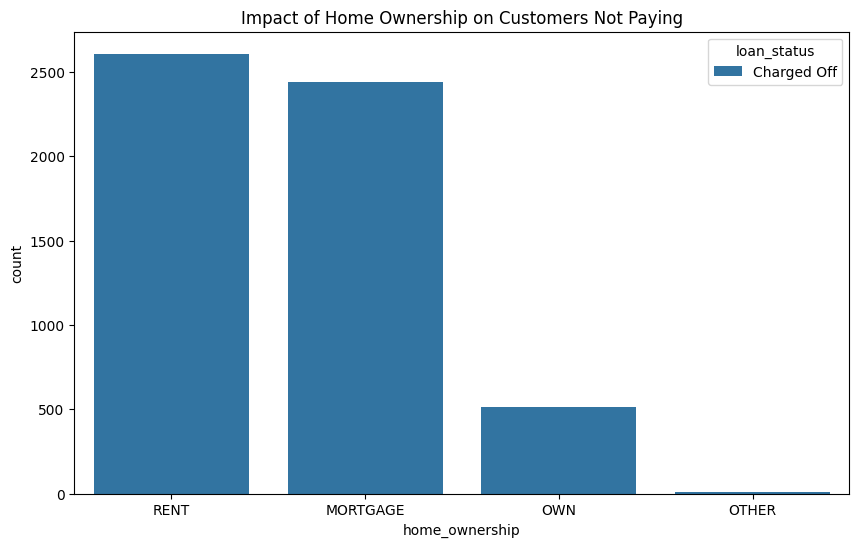

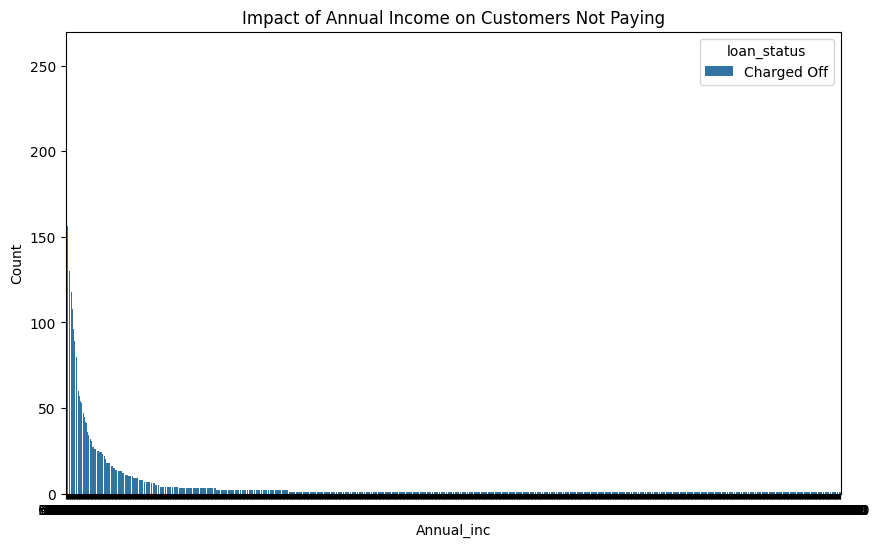

Chi-square p-value for loan grade: 1.0
Chi-square p-value for loan purpose: 1.0
Chi-square p-value for home ownership: 1.0
Chi-square p-value for annual income: 1.0


In [1]:
from Data_Transformation import DataTransform
from RDS_Database_Connector import RDSDatabaseConnector
from Database_Info import DataFrameInfo
from Data_Plots_and_EDA_Transformations import Plotter, DataFrameTransform
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

def calculate_null_counts(df):
    """
    Calculates the number of null values in each column

    Parameters:
    - df: pandas DataFrame

    Returns:
    - null_counts: pandas Series
    """
    null_counts = df.isnull().sum()
    return null_counts

### EXTRACTS DATABASE
# Creates an instance of the RDSDatabaseConnector class
test = RDSDatabaseConnector()

# Extracts loan payments database
data = test.extract_loan_payments_data()


###CONVERTS SPECIFIED COLLUMNS TO DATETIME FORMAT
# Creates an instance of the DataTransform class
transform_data = DataTransform()

# Converts specified columns to datetime format
transformed_data = transform_data.convert_columns_to_datetime(data)


### DESCRIBES COLLUMS
# Creates an instance of the DataFrameInfo class
df_info = DataFrameInfo(transformed_data)

# Describes all columns
description = df_info.describe_all_columns()
print("Description of all columns:")
print(description)


### Extracts statistical values
statistics = df_info.extract_statistical_values()
print("\nStatistical values:")
print(statistics)

# Counts distinct values
distinct_values = df_info.count_distinct_values()
print("\nCount of distinct values:")
print(distinct_values)

# Prints shape of the DataFrame
print("\nDataFrame shape:")
print(df_info.df.shape)

# Counts NULL values before removal
null_counts_before_removal = calculate_null_counts(transformed_data)


### DROPS COLLUMNS
# Determines which columns should be dropped based on a threshold of 20% null values
threshold = 0.2
columns_to_drop = null_counts_before_removal[null_counts_before_removal > threshold * len(transformed_data)].index

# Visualises the removal of null values
Plotter.visualize_after_imputation(data, transformed_data, columns_to_drop)

# Prints the number of columns before dropping
print("Number of columns before dropping:", len(transformed_data.columns))

# Drops the columns
transformed_data_dropped = transformed_data.drop(columns=columns_to_drop)

# Prints the number of columns after dropping columns
print("Number of columns after dropping:", len(transformed_data_dropped.columns))


print(f"DataFrame with columns containing more than {threshold*100}% NULL values dropped")


print(" ")
print("The number of null counts per column after columns with more than 20% null values have been removed:")
print(null_counts_before_removal)


### DEALING WITH NULL VALUES
# Creates an instance of the DataFrameTransform class
data_transformer = DataFrameTransform()

# Imputes null values
imputed_data = data_transformer.impute_nulls(transformed_data_dropped)

# Recalculates null counts after imputations
null_counts_after_imputation = calculate_null_counts(imputed_data)


print(" ")
print("Number of null counts per column after imputations:")
print(null_counts_after_imputation)

# List of columns to exclude from distribution visualisation
exclude_columns = ['id', 'member_id', 'term', 'employment_length', 'annual_inc', 'delinq_2yrs',
                   'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee',
                   'recoveries', 'collection_recovery_fee', 'last_payment_amount',
                   'collections_12_mths_ex_med', 'policy_code']

# Visualises the distribution of numeric columns
Plotter.visualize_distribution_numeric(imputed_data, exclude_columns)


### DEALING WITH SKEWNESS
# Creates an instance of the DataFrameTransform class
data_transformer = DataFrameTransform()

# Specifies the columns to reduce skewness
skewness_columns = ['total_rec_prncp', 'total_payment_inv', 'total_payment', 'instalment',
                    'funded_amount_inv', 'funded_amount', 'loan_amnount']

# Reduces skewness using logarithmic transformation
log_transformed_data_dropped = data_transformer.reduce_skewness_log(imputed_data, skewness_columns)

# Visualises the distribution of every column after skewness reduction
Plotter.visualize_distribution_numeric(log_transformed_data_dropped)


### REMOVAL OF OUTLIERS
print(" ")
print("REMOVAL OF OUTLIERS:")
print(" ")
print(" ")

# Creates an instance of the DataFrameTransform class
data_transformer = DataFrameTransform()

# Removes outliers from numeric columns
outliers_removed_data = data_transformer.remove_outliers_zscore(imputed_data)

# Visualises the distribution of columns after removing outliers
Plotter.visualize_distribution_numeric(outliers_removed_data)


### REMOVAL OF HIGHLY CORRELATED COLUMNS
numeric_columns = log_transformed_data_dropped.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = log_transformed_data_dropped[numeric_columns].corr()

# Visualises the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

# Identifies highly correlated columns based on a correlation threshold
correlation_threshold = 0.8

highly_correlated_pairs = [(col1, col2) for col1 in correlation_matrix.columns
                           for col2 in correlation_matrix.columns
                           if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > correlation_threshold]

print(f"Highly correlated numeric column pairs above threshold ({correlation_threshold}): {highly_correlated_pairs}")

# Decides which columns to remove
columns_to_remove = set()

for col1, col2 in highly_correlated_pairs:
    if col1 not in columns_to_remove and col2 not in columns_to_remove:
        if col1 not in ['total_payment', 'instalment'] and col2 not in ['total_payment', 'instalment']:
            columns_to_remove.add(col2)

# Removes the highly correlated columns from the dataset
print("Columns to remove:", columns_to_remove)
transformed_data_no_collinearity = log_transformed_data_dropped.drop(columns=columns_to_remove)

# Prints the columns which were removed
print(f"Numeric columns removed due to high correlation: {columns_to_remove}")

# Saves the modified DataFrame to a CSV file
csv_path_no_collinearity = "/Users/sambarlow/AI_Core/Finance_Project/finalised_loan_payments_data_numeric.csv"
transformed_data_no_collinearity.to_csv(csv_path_no_collinearity, index=False)
print(f"DataFrame with highly correlated numeric columns removed and saved to {csv_path_no_collinearity}")

# Milestone 4, Task 2
# Filters loans marked as Charged Off
charged_off_loans = transformed_data_no_collinearity[transformed_data_no_collinearity['loan_status'] == 'Charged Off'].copy()

# Calculates the percentage of charged-off loans
charged_off_percentage = (charged_off_loans.shape[0] / transformed_data_no_collinearity.shape[0]) * 100

# Calculates the total amount paid towards charged-off loans
total_paid_amount = charged_off_loans['total_payment'].sum()

# Prints the results
print(" ")
print(" ")
print(f"Percentage of Charged Off Loans: {charged_off_percentage:.2f}%")
print(f"Total Amount Paid towards Charged Off Loans: £{total_paid_amount:.2f}")

# Milestone 4, Task 3
# Calculates Remaining Payments
charged_off_loans['remaining_term'] = charged_off_loans['term'] - charged_off_loans['total_payment']

# Calculates Projected Loss for Each Loan
charged_off_loans['projected_loss'] = charged_off_loans['remaining_term'] * charged_off_loans['instalment']

# Calculates Total Projected Loss
total_projected_loss = charged_off_loans['projected_loss'].sum()


# Plots projected loss over remaining term for charged off loans
plt.figure(figsize=(10, 6))
sns.barplot(x=charged_off_loans['id'], y=charged_off_loans['projected_loss'])
plt.xlabel('Loan ID')
plt.ylabel('Projected Loss')
plt.title('Projected Loss Over Remaining Term for Charged Off Loans')
plt.show()

# Print Total Projected Loss
print(f"Total Projected Loss for Charged Off Loans: £{total_projected_loss:.2f}")

# Milestone 4, Task 4
# Identifies customers who have 'late' in their loan_status
late_payments_customers = transformed_data_no_collinearity[transformed_data_no_collinearity['loan_status'].str.contains('late', case=False)].copy()

# Calculates the percentage of customers behind on their loan payments
percentage_late_payments = (late_payments_customers.shape[0] / transformed_data_no_collinearity.shape[0]) * 100

# Calculates the total amount of customers behind on their loan payments
total_late_payments_customers = late_payments_customers.shape[0]

# Calculates the loss the company would incur if these individuals' statuses were changed to Charged Off
loss_due_to_late_payments = late_payments_customers['total_payment'].sum()

# Calculates the projected loss of these loans if the customer were to finish the full loan term
late_payments_customers['remaining_term'] = late_payments_customers['term'] - late_payments_customers['total_payment']
late_payments_customers['projected_loss'] = late_payments_customers['remaining_term'] * late_payments_customers['instalment']
projected_loss_due_to_late_payments = late_payments_customers['projected_loss'].sum()

# Prints the results
print(f"The percentage of customers currently behind on loan payments in relation to total customers: {percentage_late_payments:.2f}%")
print(f"The number of customers behind on loan payments: {total_late_payments_customers}")
print(f"The loss the company would face if the status of the individuals behind on payments were changed to Charged Off: £{loss_due_to_late_payments:.2f}")
print(f"The projected loss the company would face if these customers were to finish their full loan term: £{projected_loss_due_to_late_payments:.2f}")

# Calculates the percentage of total expected revenue represented by late payments and defaulted loans
total_expected_revenue = transformed_data_no_collinearity['total_payment'].sum()
percentage_of_total_expected_revenue = ((loss_due_to_late_payments + total_projected_loss) / total_expected_revenue) * 100

# Prints the percentage of total expected revenue represented by late payments and defaulted loans
print(f"The percentage of total expected revenue represented by customers who have late payments and defaulted loans: {percentage_of_total_expected_revenue:.2f}%")


# Milestone 4, Task 5
# Creates a subset of users who have already stopped paying (Charged Off) and users currently behind on payments
charged_off_subset = transformed_data_no_collinearity[transformed_data_no_collinearity['loan_status'] == 'Charged Off'].copy()
late_payments_subset = transformed_data_no_collinearity[transformed_data_no_collinearity['loan_status'].str.contains('late', case=False)].copy()

# Impact of loan grade on customers not paying
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=charged_off_subset, order=sorted(charged_off_subset['grade'].unique()))
plt.title('Impact of Loan Grade on Customers Not Paying')
plt.show()

# Impact of loan purpose on customers not paying
plt.figure(figsize=(14, 8))
sns.countplot(x='purpose', hue='loan_status', data=charged_off_subset, order=charged_off_subset['purpose'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Impact of Loan Purpose on Customers Not Paying')
plt.show()

# Impact of home ownership on customers not paying
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=charged_off_subset, order=charged_off_subset['home_ownership'].value_counts().index)
plt.title('Impact of Home Ownership on Customers Not Paying')
plt.show()

# Impact of annual income category on customers not paying
plt.figure(figsize=(10, 6))
sns.countplot(x='annual_inc', hue='loan_status', data=charged_off_subset, order=charged_off_subset['annual_inc'].value_counts().index)
plt.title('Impact of Annual Income on Customers Not Paying')
plt.xlabel('Annual_inc')
plt.ylabel('Count')
plt.show()


# Chi-square test for loan grade
grade_table = pd.crosstab(charged_off_subset['grade'], charged_off_subset['loan_status'])
chi2_stat, p_value, _, _ = chi2_contingency(grade_table)
print(f"Chi-square p-value for loan grade: {p_value}")

# Chi-square test for loan purpose
loan_purpose_table = pd.crosstab(charged_off_subset['purpose'], charged_off_subset['loan_status'])
chi2_stat_loan_purpose, p_value_loan_purpose, _, _ = chi2_contingency(loan_purpose_table)
print(f"Chi-square p-value for loan purpose: {p_value_loan_purpose}")

# Chi-square test for home ownership
home_ownership_table = pd.crosstab(charged_off_subset['home_ownership'], charged_off_subset['loan_status'])
chi2_stat_home_ownership, p_value_home_ownership, _, _ = chi2_contingency(home_ownership_table)
print(f"Chi-square p-value for home ownership: {p_value_home_ownership}")

# Chi-square test for annual income
income_category_table = pd.crosstab(charged_off_subset['annual_inc'], charged_off_subset['loan_status'])
chi2_stat_income, p_value_income, _, _ = chi2_contingency(income_category_table)
print(f"Chi-square p-value for annual income: {p_value_income}")

